# Project Overview:

### Introduction:
This project focuses on analyzing and predicting readmission rates of diabetic patients using the "Diabetes 130-US hospitals for years 1999-2008" dataset. Readmission refers to the return of patients to the hospital within a certain period after their initial discharge. Understanding the factors that contribute to readmission and developing a predictive model can assist healthcare providers in implementing targeted interventions and improving patient outcomes.

### Problem Statement:
The problem addressed in this project is to develop a predictive model that accurately estimates the likelihood of readmission for diabetic patients. By identifying the factors associated with readmission, healthcare providers can proactively intervene and provide appropriate care to reduce readmission rates and enhance patient management.

### Objectives:
The main objectives of this project are as follows:

Exploratory Data Analysis (EDA): Perform a comprehensive analysis of the "Diabetes 130-US hospitals for years 1999-2008" dataset to gain insights into patient demographics, medical history, medications, and other relevant factors. Identify patterns, trends, and correlations within the data.

Feature Engineering and Selection: Preprocess the dataset by handling missing values, transforming variables if necessary, and selecting the most relevant features for predicting readmission. This step aims to enhance the quality and relevance of the data for modeling.

Build Predictive Model: Develop a predictive model using appropriate machine learning algorithms to estimate the probability of readmission for diabetic patients. Evaluate and fine-tune the model to achieve optimal performance.

Interpretation and Insights: Interpret the results of the predictive model and provide insights into the factors that significantly impact readmission rates. Identify the most influential variables and their relative importance in predicting readmission.

### About the Data:
The "Diabetes 130-US hospitals for years 1999-2008" dataset contains information from 130 US hospitals and covers a time period spanning from 1999 to 2008. It includes various features such as patient demographics (e.g., age, gender, race), medical history (e.g., previous diagnoses, procedures), medications, and laboratory results. The dataset consists of over 100,000 instances, providing a substantial amount of data for analysis and modeling. Additionally, the dataset includes a weight column that can be utilized for further analysis or modeling purposes. The dataset can be accessed through the provided link: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

## 1. DATA UNDERSTANDING

Importing libraries that will be used in this notebook.

In [71]:
#Importing the Necessary Libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
data= pd.read_csv('diabetic_data.csv')
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


- The dataset contains 101,766 rows, indicating that there are records for a large number of encounters in the hospital.

- The dataset has 50 columns, providing a wide range of information about each encounter.

- Some columns appear to have missing values denoted by "?", which may need to be addressed before doing analysis.

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [74]:
data.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

The data shows no missing values. However, the missing values are denoted by "?"

In [75]:
# Find columns with "?" values
columns_with_question_mark = []
for column in data.columns:
    if data[column].dtype == 'object' and data[column].str.contains('\?').any():
        columns_with_question_mark.append(column)

# Create a DataFrame to store the results
result_df = pd.DataFrame(columns=['Column', 'Number of "?"', 'Percentage'])

# Calculate and store the values in the DataFrame
for column in columns_with_question_mark:
    question_mark_count = data[column].str.count('\?').sum()
    total_count = len(data[column])
    percentage = (question_mark_count / total_count) * 100
    result_df = result_df.append({'Column': column, 'Number of "?"': question_mark_count, 'Percentage': percentage}, ignore_index=True)

# Print the result DataFrame
result_df

,Column,"Number of ""?""",Percentage
0,race,2273,2.233555
1,weight,98569,96.858479
2,payer_code,40256,39.557416
3,medical_specialty,49949,49.082208
4,diag_1,21,0.020636
5,diag_2,358,0.351787
6,diag_3,1423,1.398306


- The dataset contains missing values represented by "?" in multiple columns. 
- The "weight" column has the highest percentage of missing values, with 96.86% of the entries being "?". 

In [76]:
def replace_question_mark(df):

    # Iterate over each column in the DataFrame
    for column in df.columns:
        
        # Replace '?' with NaN using numpy's nan value
        df[column] = df[column].replace('?', 'Missing')

    return df

replace_question_mark(data)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),Missing,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Missing,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Missing,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Missing,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Missing,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),Missing,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),Missing,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),Missing,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),Missing,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


- Converted the '?' which indicated missing values to Missing.

In [77]:
def print_missing_values(df):
    # Find columns with missing values
    columns_with_missing_values = df.columns[df.isin(['Missing']).any()]

    # Create a DataFrame to store the results
    result_df = pd.DataFrame(columns=['Column', 'Missing Values', 'Percentage'])

    # Calculate and store the values in the DataFrame
    for column in columns_with_missing_values:
        missing_count = (df[column] == 'Missing').sum()
        total_count = len(df[column])
        percentage = (missing_count / total_count) * 100
        result_df = result_df.append({'Column': column, 'Missing Values': missing_count, 'Percentage': percentage}, ignore_index=True)

    print(result_df)

print_missing_values(data)

              Column Missing Values  Percentage
0               race           2273    2.233555
1             weight          98569   96.858479
2         payer_code          40256   39.557416
3  medical_specialty          49949   49.082208
4             diag_1             21    0.020636
5             diag_2            358    0.351787
6             diag_3           1423    1.398306



After converting the "?" values to 'Missing', the "weight" column still has a high percentage of missing values, with all entries missing (approximately 96.86%).

## Initial Data Exploration 
1. Categorical columns

In [78]:
def print_categorical_columns(df):
    # Find categorical columns
    categorical_columns = df.select_dtypes(include='object').columns

    # Print the column names
    for column in categorical_columns:
        print(column)

print_categorical_columns(data)

race
gender
age
weight
payer_code
medical_specialty
diag_1
diag_2
diag_3
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
readmitted


There are quite a number of categorical columns

Value Counts:
Caucasian          76099
AfricanAmerican    19210
Missing             2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


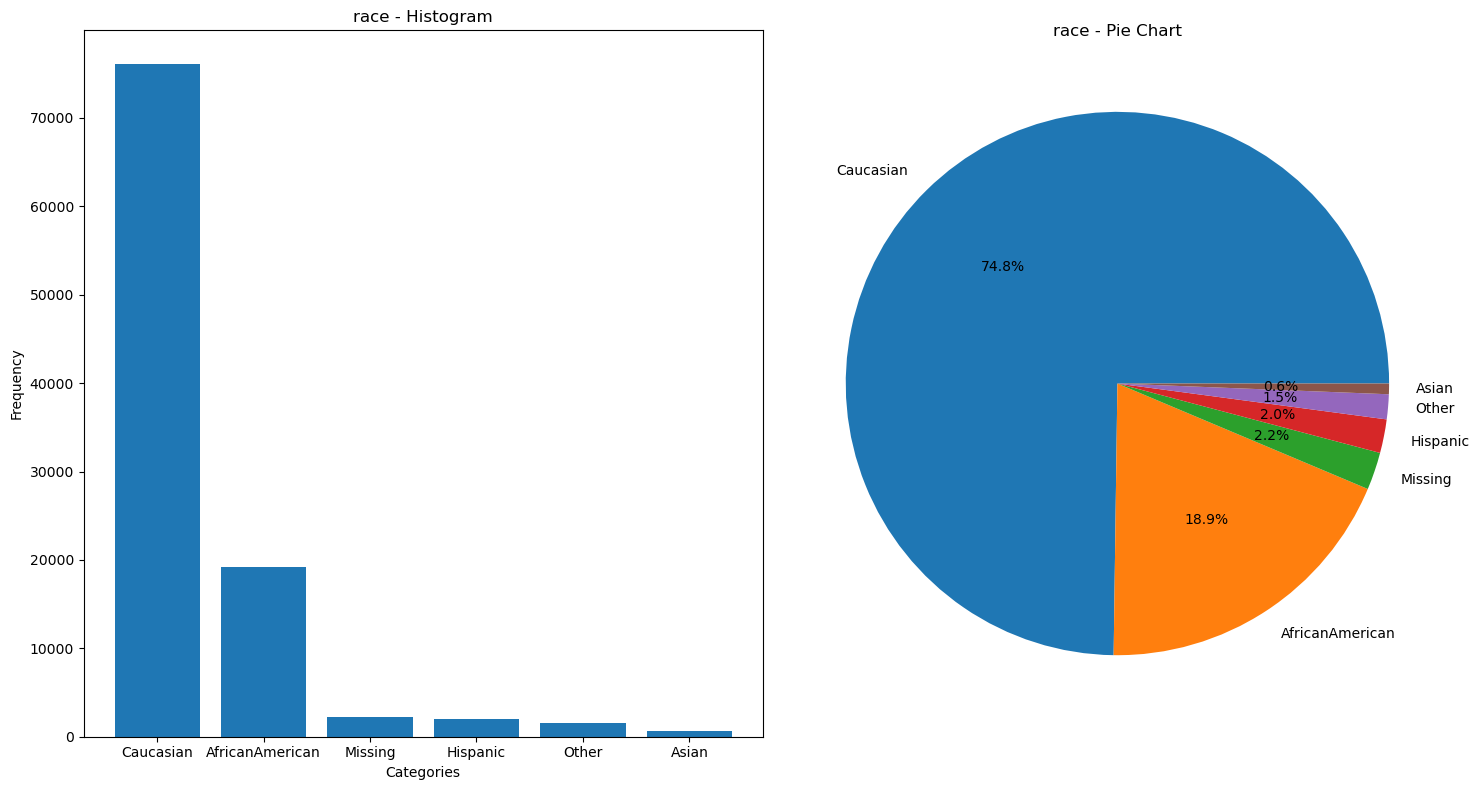

In [79]:
def plot_histogram_pie(column):
    if isinstance(column, str):
        column = data[column]
    elif not isinstance(column, pd.Series):
        raise ValueError("Invalid input. Please provide a pandas Series or DataFrame column.")

    # Print the values
    print("Value Counts:")
    print(column.value_counts(dropna=False))

    # Plot the histogram and pie chart
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

    # Plot the histogram
    ax1.bar(column.value_counts().index, column.value_counts().values)
    ax1.set_title(column.name + ' - Histogram')
    ax1.set_xlabel('Categories')
    ax1.set_ylabel('Frequency')

    # Plot the pie chart
    ax2.pie(column.value_counts().values, labels=column.value_counts().index, autopct='%1.1f%%')
    ax2.set_title(column.name + ' - Pie Chart')

    # Display the plots
    plt.tight_layout()
    plt.show()

plot_histogram_pie('race')


The race distribution in the dataset shows that the majority of patients are Caucasian, accounting for approximately 76,099 instances. 

African Americans are the second largest racial group, with 19,210 instances. 

Notably, there are 2,273 instances where the race information is missing.

Value Counts:
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


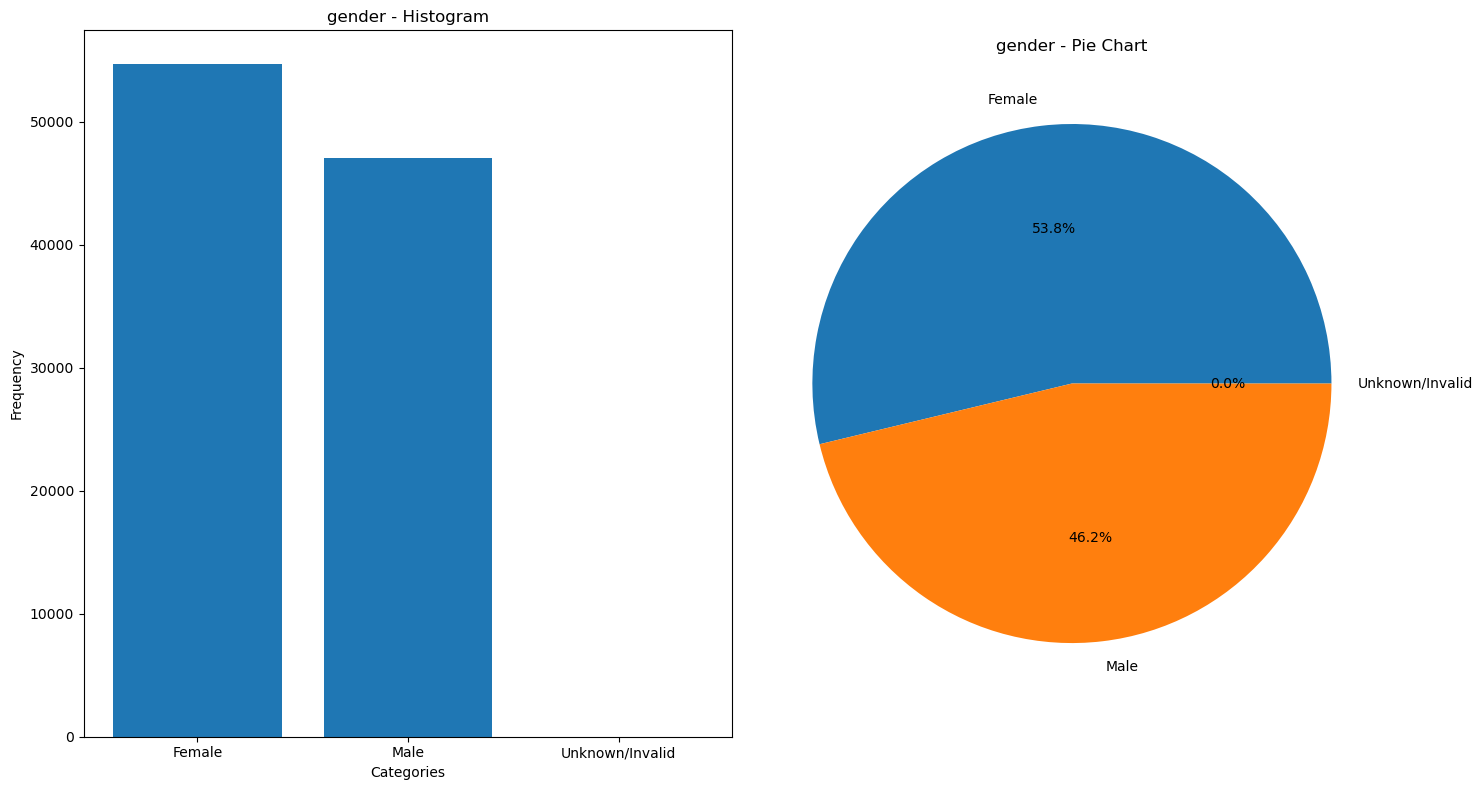

In [80]:
plot_histogram_pie('gender')

The gender distribution in the dataset indicates that there are more female patients, with approximately 54,708 instances. 

Male patients follow closely behind with 47,055 instances. 

However, there are only three instances where the gender is classified as "Unknown/Invalid."

Value Counts:
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


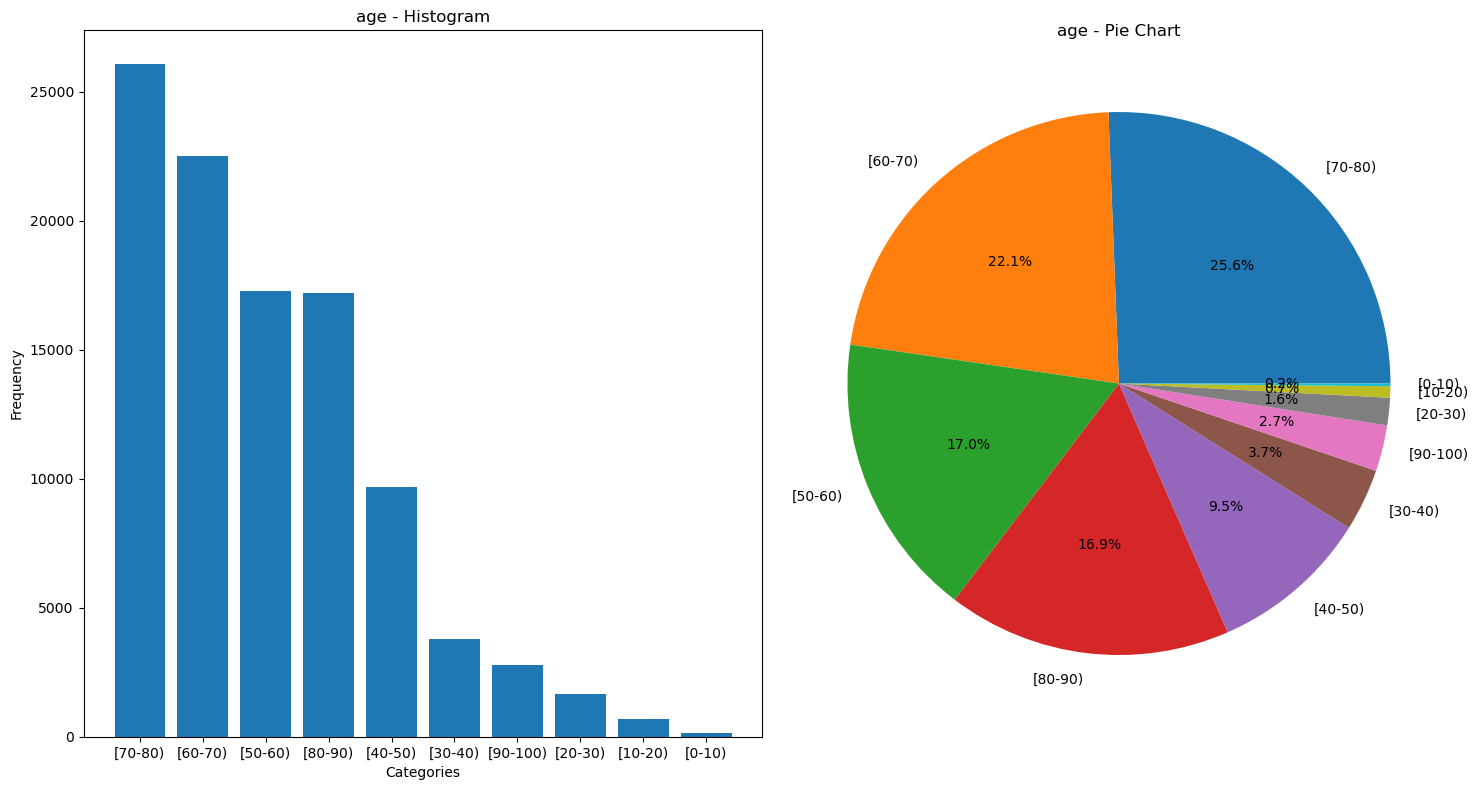

In [81]:
plot_histogram_pie('age')

The age distribution in the dataset reveals that the largest patient group falls within the age range of 70-80, with 26,068 instances. 

This is followed by the age range of 60-70, which has 22,483 instances. 

The distribution shows a gradual decline in the number of instances as the age range decreases, with the smallest group being patients aged 0-10, comprising only 161 instances. 

Understanding the age distribution can help in tailoring healthcare interventions and treatment plans according to the specific needs of different age groups.

Value Counts:
Missing      98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64


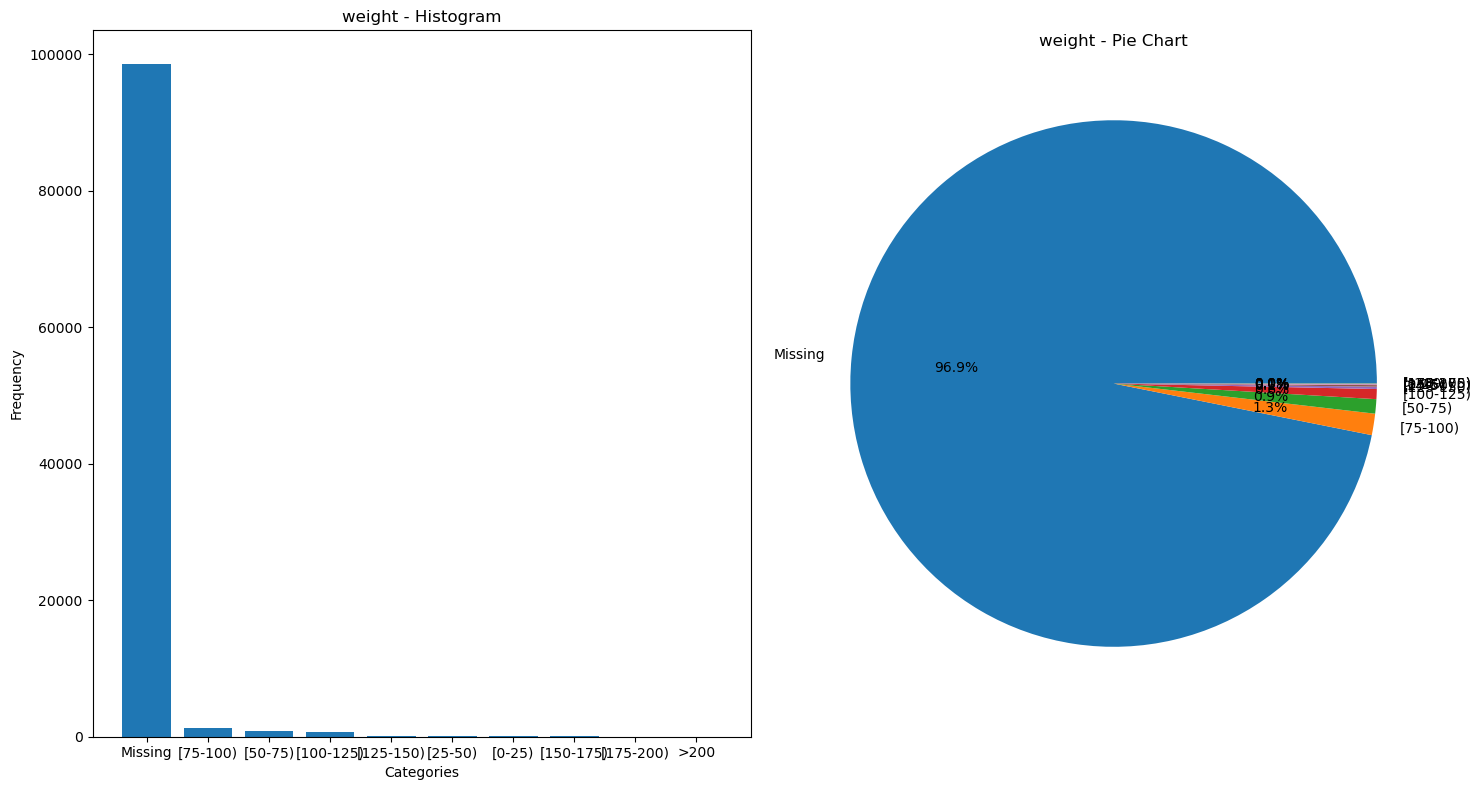

In [82]:
plot_histogram_pie('weight')

The weight column in the dataset has a large number of missing values, with 98,569 instances marked as "Missing". 

Among the available weight values, the majority fall within the range of 75-100, with 1,336 instances. There are also smaller numbers of instances in other weight ranges, such as [50-75], [100-125], [125-150], [25-50], [0-25], [150-175], [175-200], and >200. 

The high number of missing values in the weight column poses a challenge for analyzing weight-related insights.

Value Counts:
Missing    40256
MC         32439
HM          6274
SP          5007
BC          4655
MD          3532
CP          2533
UN          2448
CM          1937
OG          1033
PO           592
DM           549
CH           146
WC           135
OT            95
MP            79
SI            55
FR             1
Name: payer_code, dtype: int64


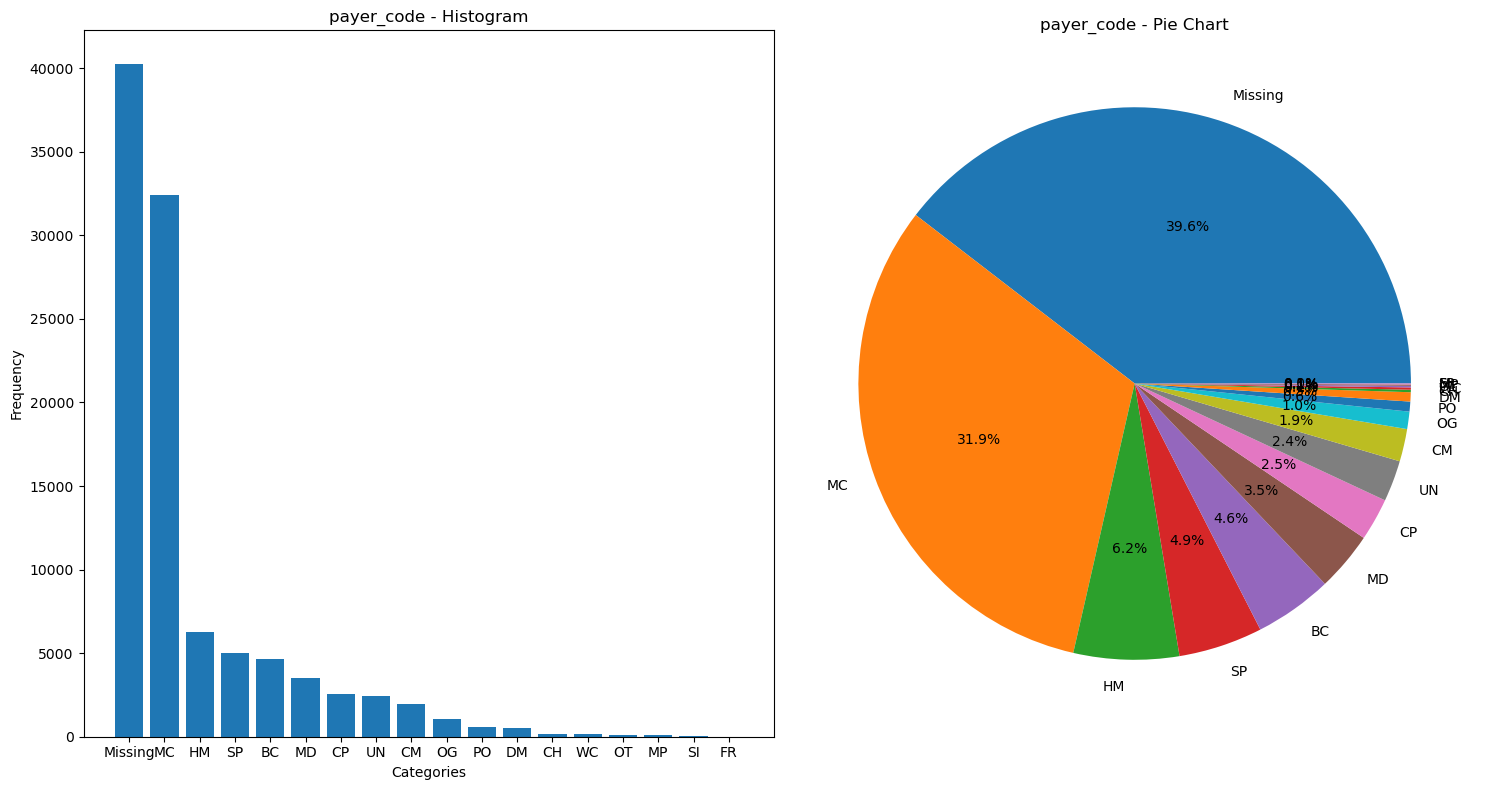

In [83]:
plot_histogram_pie('payer_code')

The payer_code column in the dataset exhibits a considerable number of missing values, with 40,256 instances marked as "Missing." 

Among the available values, the most frequent payer code is "MC" (Medicare), with 32,439 instances. Other common payer codes include "HM" (Medicaid) with 6,274 instances, "SP" (Sponsored/Charity) with 5,007 instances, and "BC" (Blue Cross/Blue Shield) with 4,655 instances. 

The presence of various payer codes indicates the diverse insurance coverage of patients in the dataset, which can have implications for healthcare utilization and reimbursement.

Value Counts:
NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


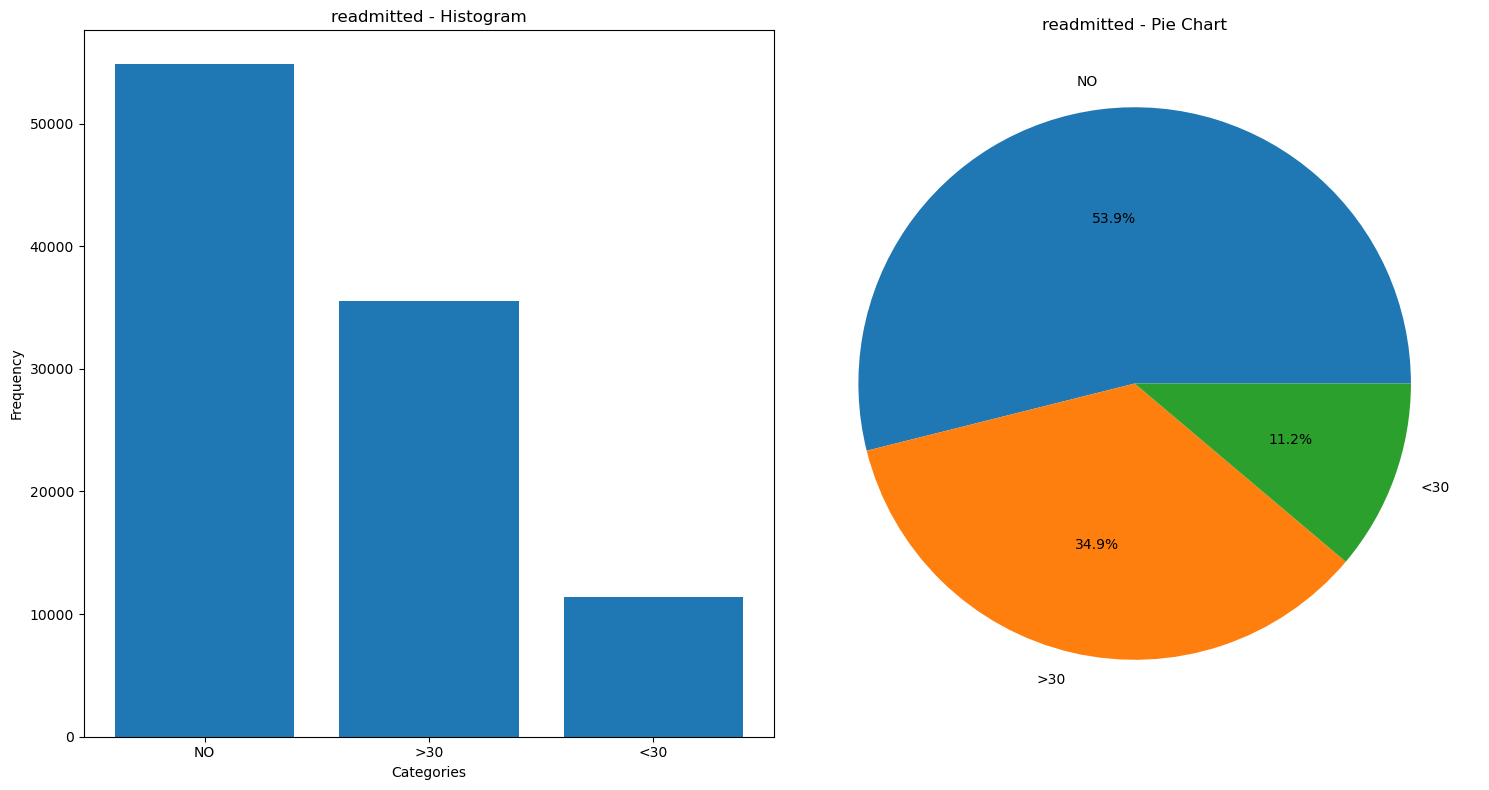

In [84]:
plot_histogram_pie('readmitted')

The "readmitted" column in the dataset indicates the readmission status of patients. 

The majority of patients, with 54,864 instances, were not readmitted to the hospital. On the other hand, 35,545 instances show patients who were readmitted after 30 days of their initial discharge. Additionally, there are 11,357 instances where patients were readmitted within 30 days.

Understanding the readmission status can help identify factors that contribute to readmission and inform strategies for improving patient care and reducing readmission rates.

Value Counts:
Missing                             49949
InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
                                    ...  
Surgery-PlasticwithinHeadandNeck        1
Speech                                  1
Psychiatry-Addictive                    1
Neurophysiology                         1
Perinatology                            1
Name: medical_specialty, Length: 73, dtype: int64


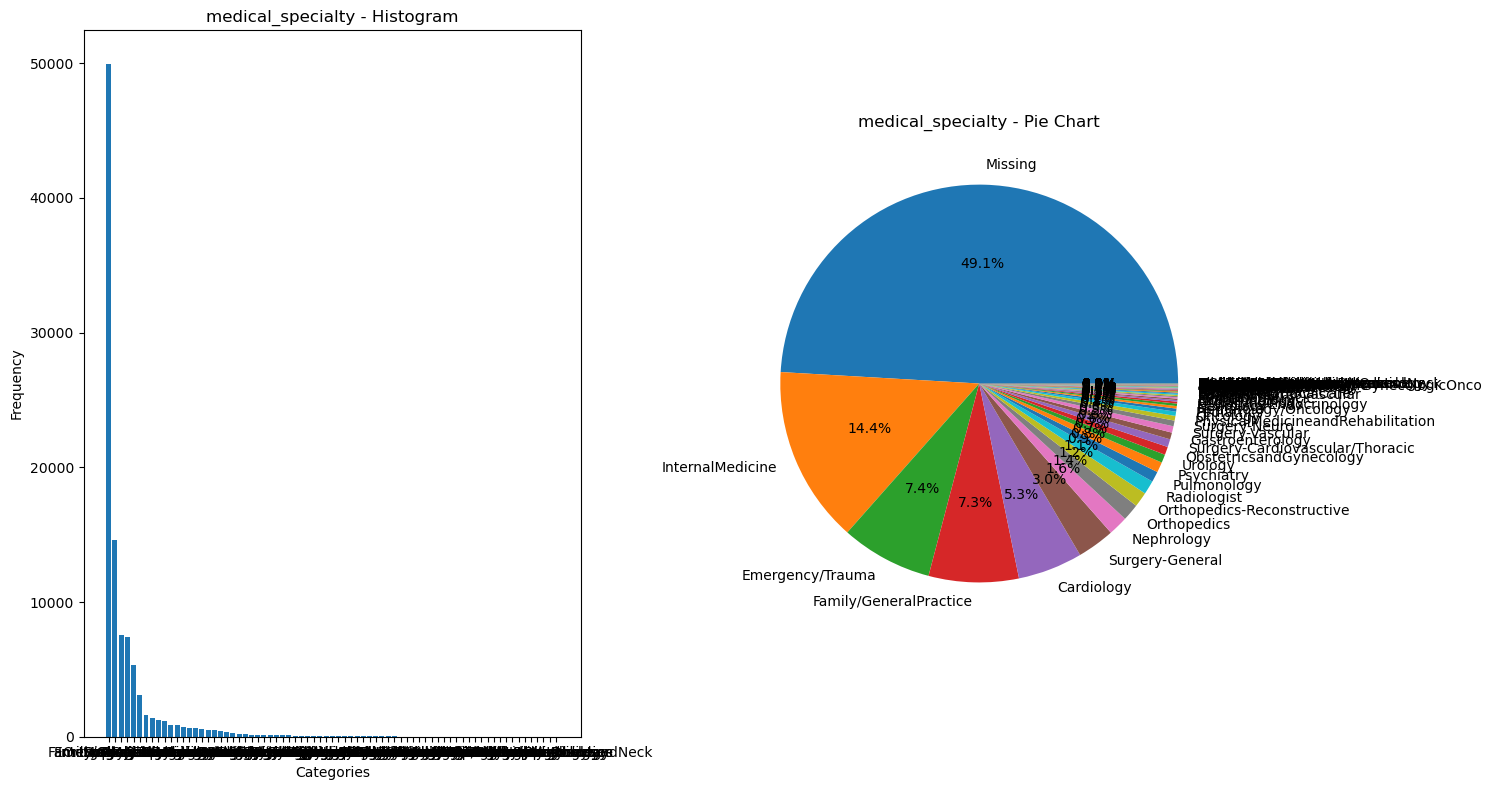

In [85]:
plot_histogram_pie('medical_specialty')

The "medical_specialty" column in the dataset shows a significant number of missing values, with 49,949 instances marked as "Missing." 

Among the available values, the most common medical specialty is "InternalMedicine" with 14,635 instances, followed by "Emergency/Trauma" with 7,565 instances and "Family/GeneralPractice" with 7,440 instances. 

There are various other medical specialties represented in the dataset, indicating the diverse range of specialties involved in patient care. 

Value Counts:
None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64


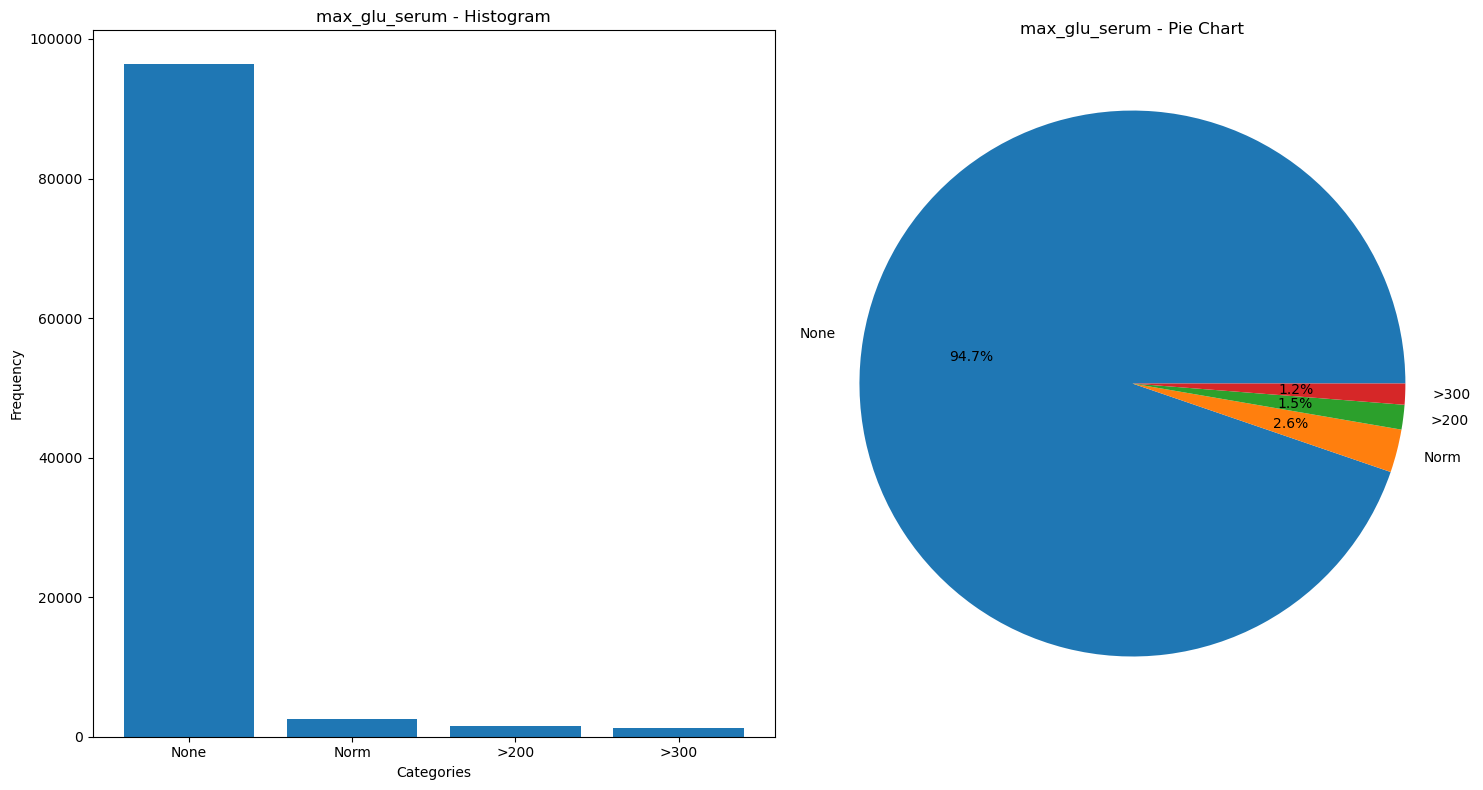

In [86]:
plot_histogram_pie('max_glu_serum')

The "max_glu_serum" column in the dataset provides information about the maximum glucose serum test result for patients. 

The majority of patients, with 96,420 instances, have a test result of "None," indicating a normal glucose level. 

There are also instances where patients have elevated glucose levels, with 2,597 instances classified as "Norm," 1,485 instances with a value greater than 200, and 1,264 instances with a value greater than 300. 

Monitoring and understanding glucose levels can be crucial in managing diabetes and other related conditions, and this information can help identify patients who may require additional interventions or treatments.

Value Counts:
None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64


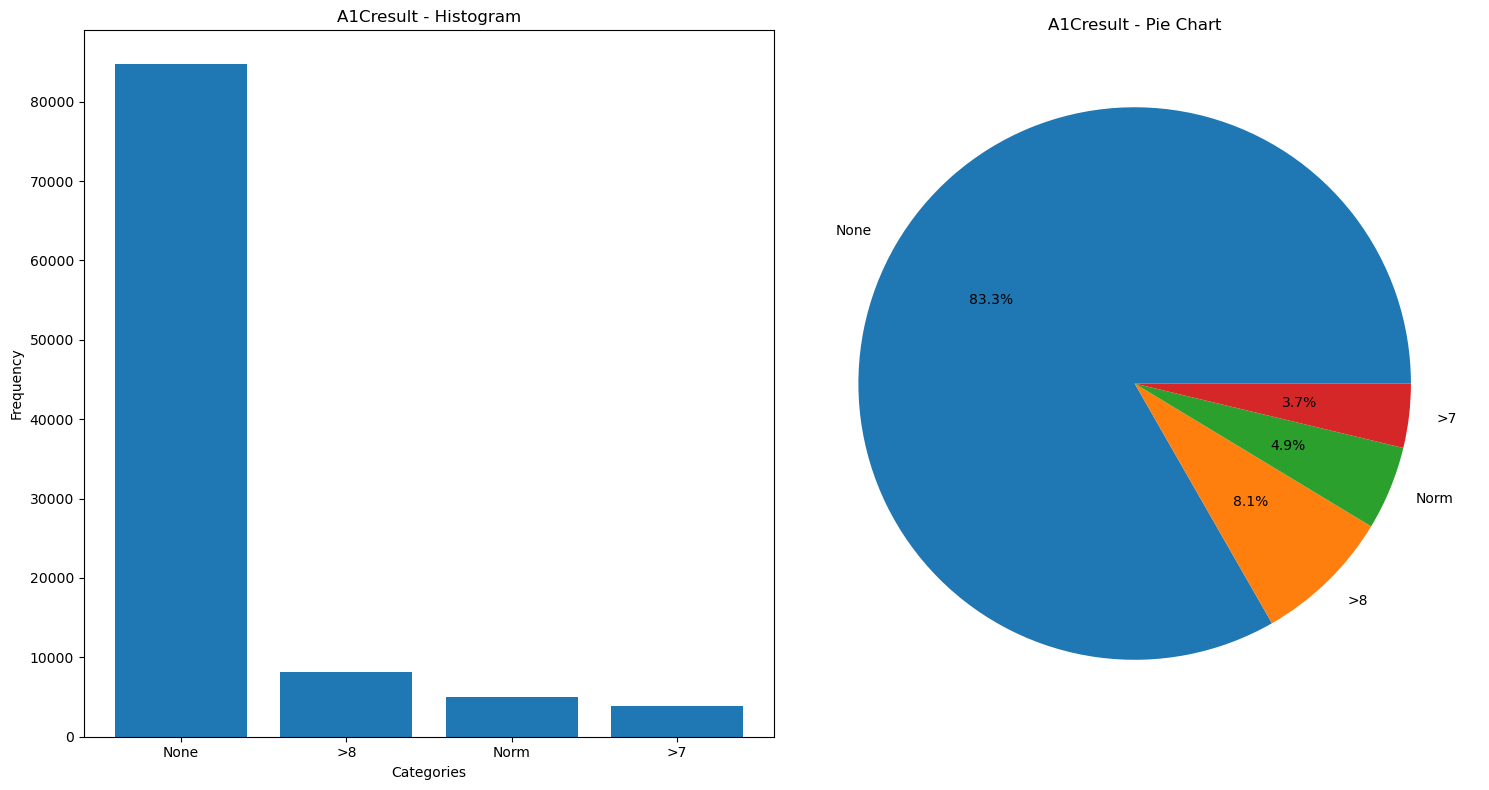

In [87]:
plot_histogram_pie('A1Cresult')

The "A1Cresult" column in the dataset provides information about the A1C test results for patients, which measures the average blood glucose levels over the past few months. 

The majority of patients, with 84,748 instances, have a test result of "None," indicating that an A1C test was not performed or the result is not available. 

There are instances where patients have A1C levels above the normal range, with 8,216 instances classified as ">8" and 3,812 instances as ">7."

Additionally, there are 4,990 instances where the A1C result falls within the normal range ("Norm"). 

Monitoring A1C levels is crucial in managing diabetes and evaluating long-term blood glucose control.

Value Counts:
No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64


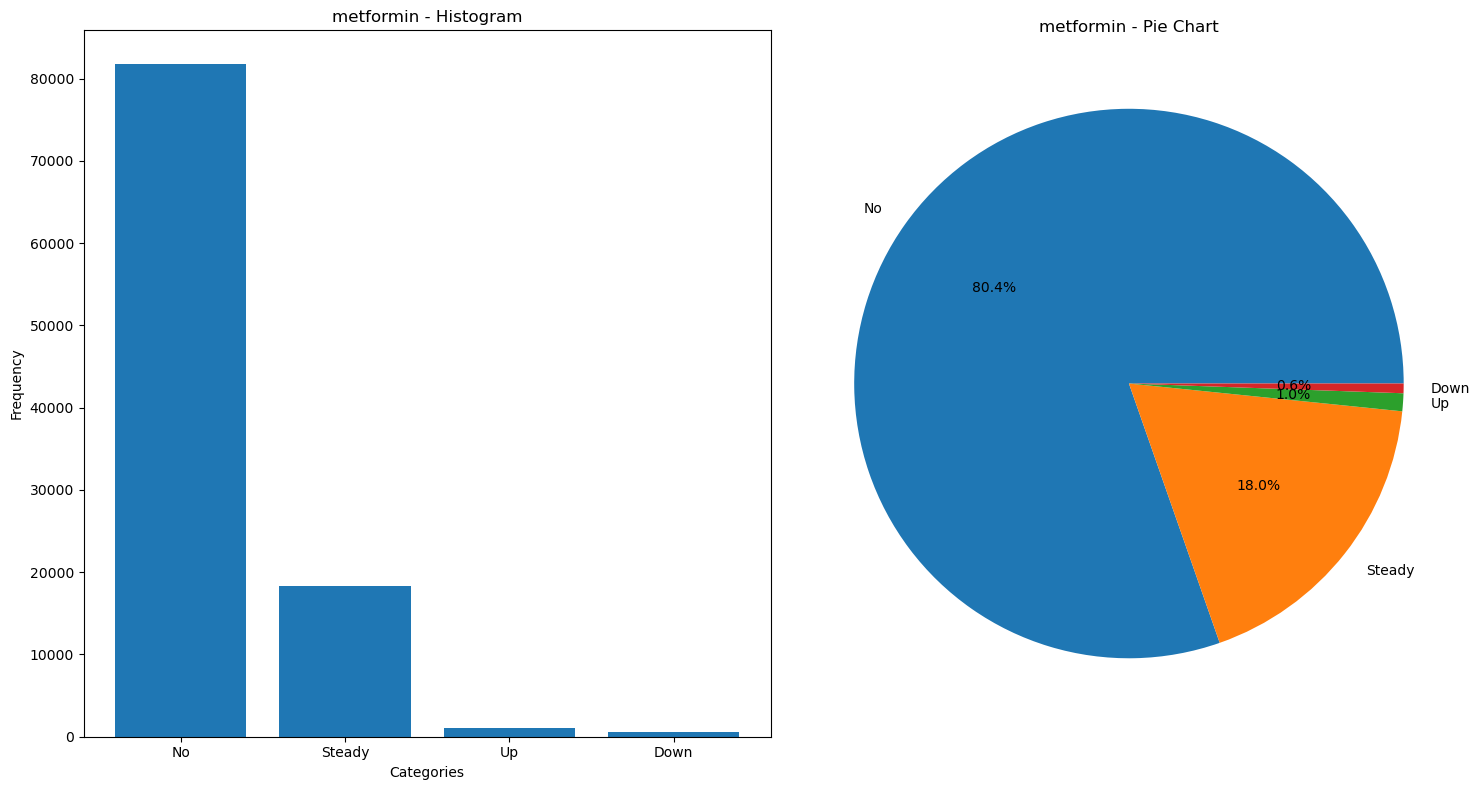

In [88]:
plot_histogram_pie('metformin')

The "metformin" column in the dataset indicates the medication dosage change for the drug metformin. 

The majority of patients, with 81,778 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 18,346 patients. 

Additionally, there are 1,067 instances where the dosage is increased ("Up") and 575 instances where the dosage is decreased ("Down"). 

Monitoring and managing medication dosages, such as metformin, are essential in diabetes management to achieve optimal treatment outcomes.

Value Counts:
No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64


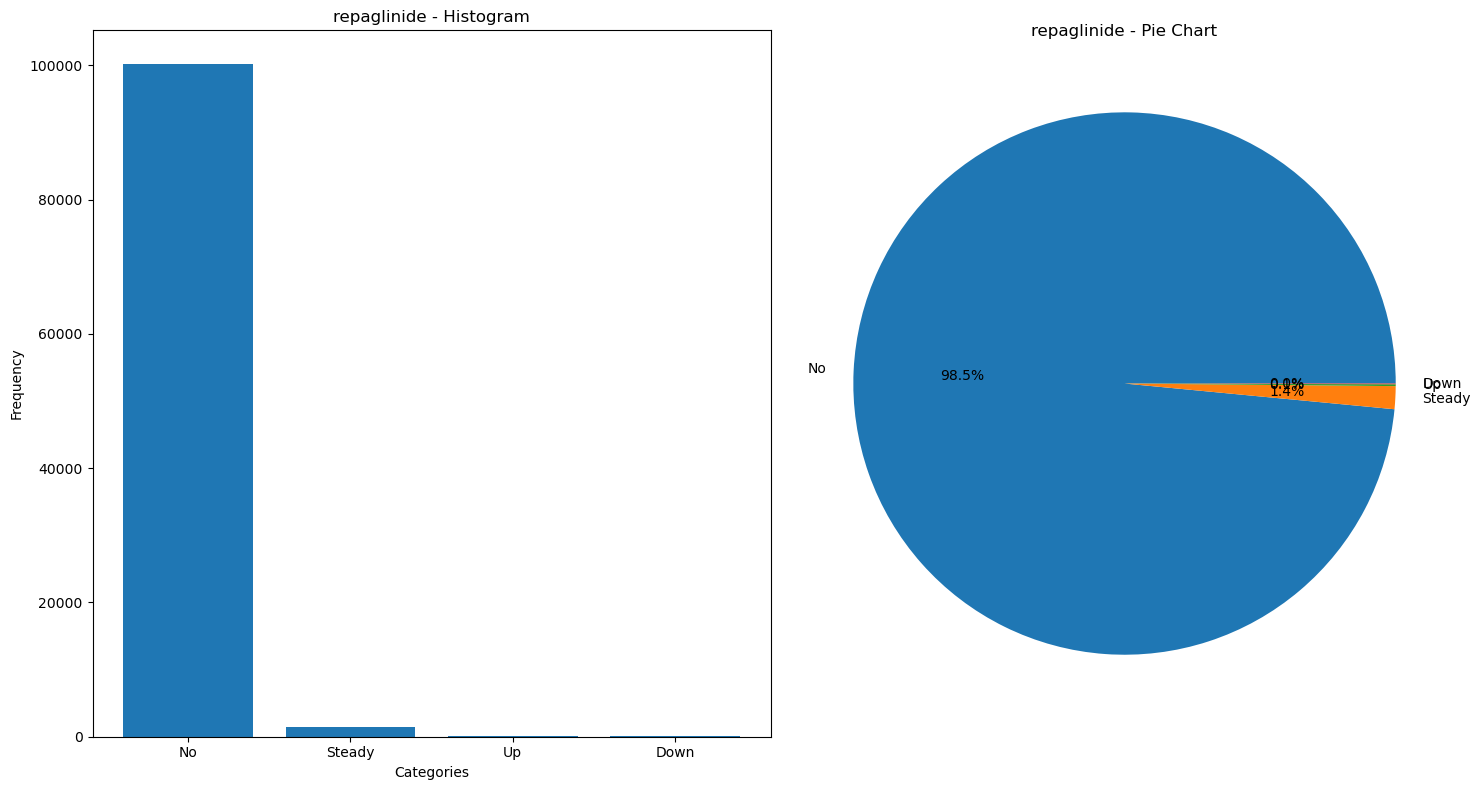

In [89]:
plot_histogram_pie('repaglinide')

The "repaglinide" column in the dataset represents the medication dosage change for the drug repaglinide. 

The majority of patients, with 100,227 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 1,384 patients. 

Additionally, there are 110 instances where the dosage is increased ("Up") and 45 instances where the dosage is decreased ("Down"). 

Monitoring and managing medication dosages, such as repaglinide, are important in diabetes management to ensure effective control of blood sugar levels.

Value Counts:
No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64


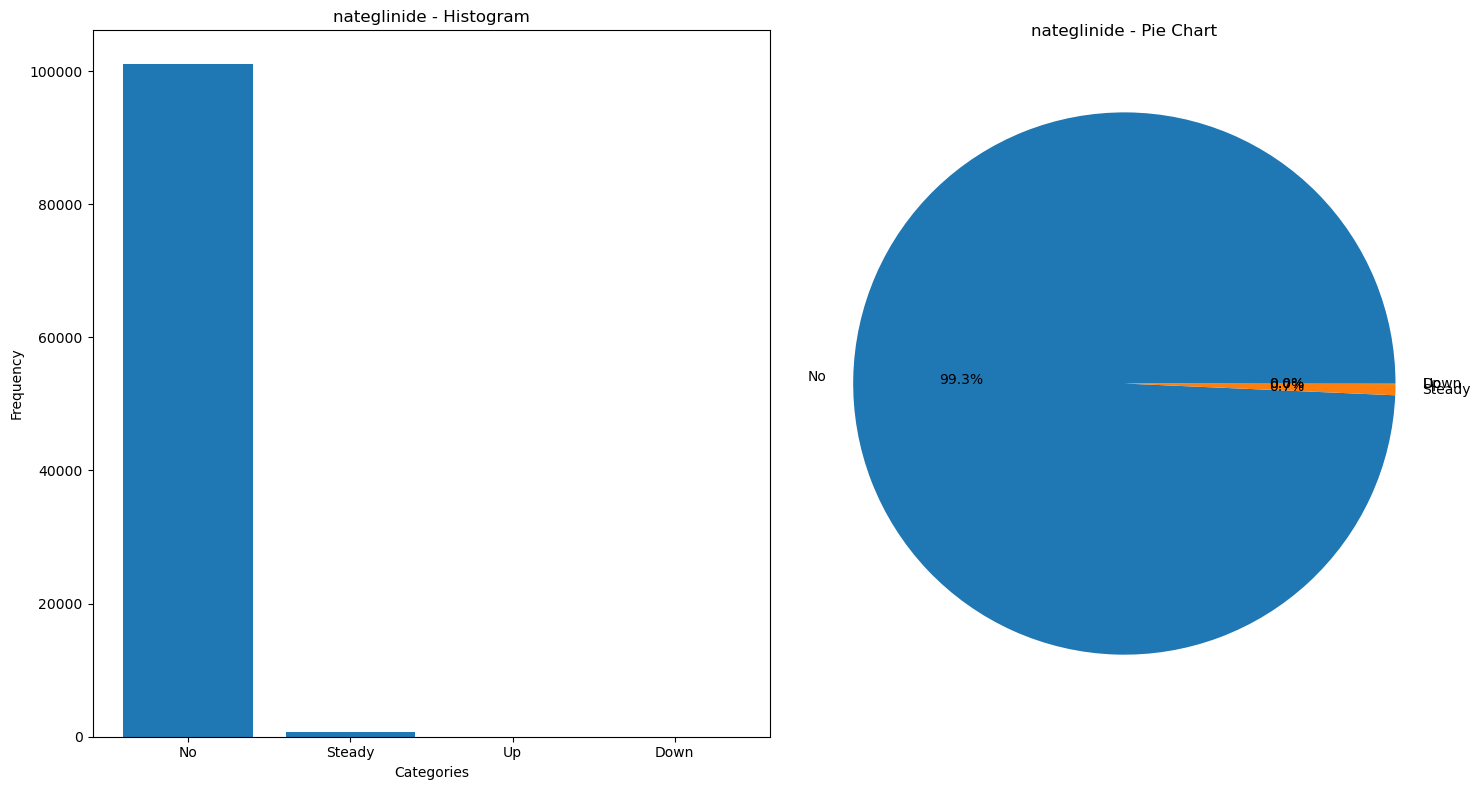

In [90]:
plot_histogram_pie('nateglinide')

The "nateglinide" column in the dataset represents the medication dosage change for the drug nateglinide. 

The majority of patients, with 101,063 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 668 patients. 

Additionally, there are 24 instances where the dosage is increased ("Up") and 11 instances where the dosage is decreased ("Down"). 

Monitoring and managing medication dosages, such as nateglinide, are important in diabetes management to ensure effective control of blood sugar levels.

Value Counts:
No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64


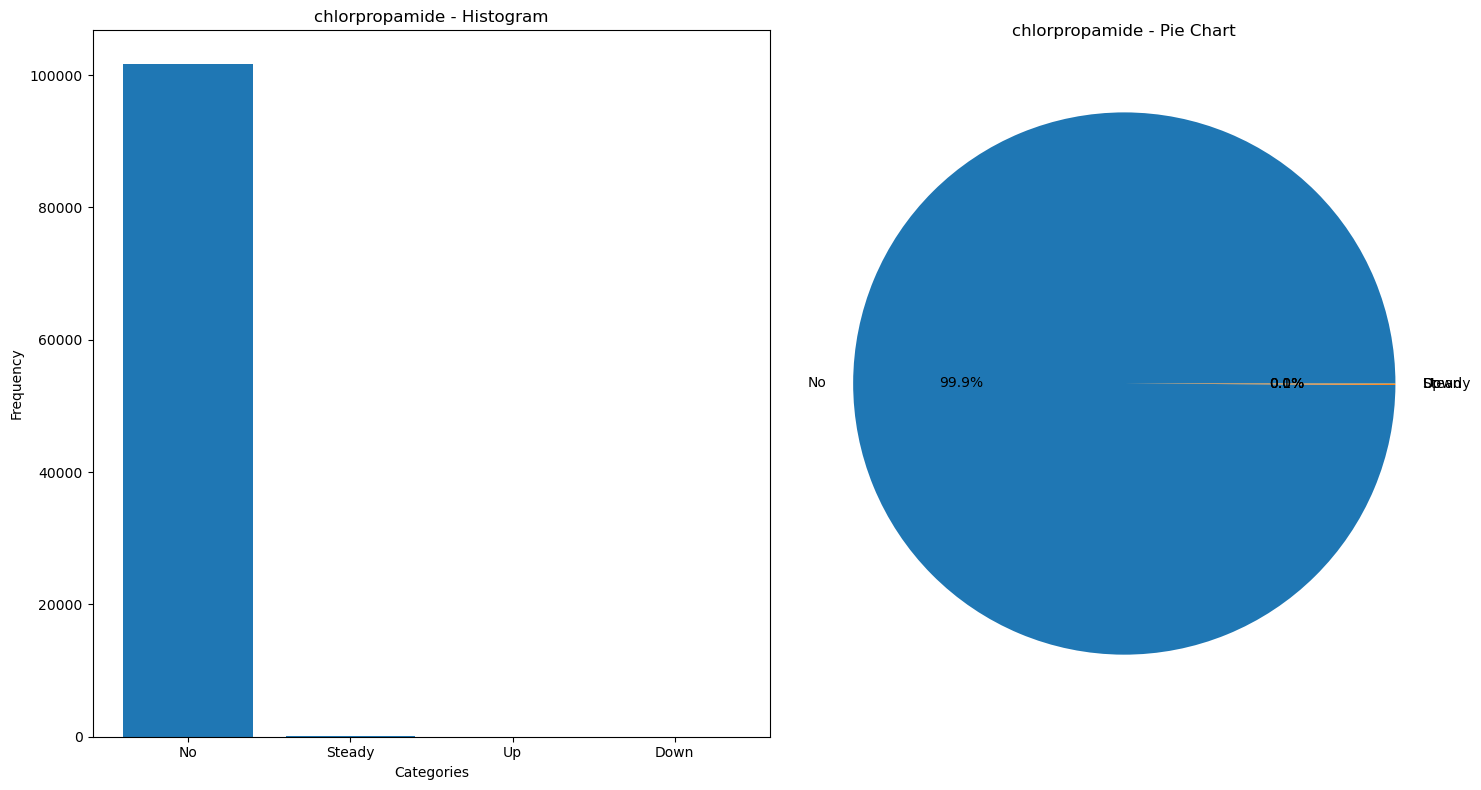

In [91]:
plot_histogram_pie('chlorpropamide')

The "chlorpropamide" column in the dataset represents the medication dosage change for the drug chlorpropamide. 

The majority of patients, with 101,680 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 79 patients. 

Additionally, there are 6 instances where the dosage is increased ("Up") and 1 instance where the dosage is decreased ("Down"). 

Monitoring and managing medication dosages, such as chlorpropamide, are important in diabetes management to ensure effective control of blood sugar levels.

Value Counts:
No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64


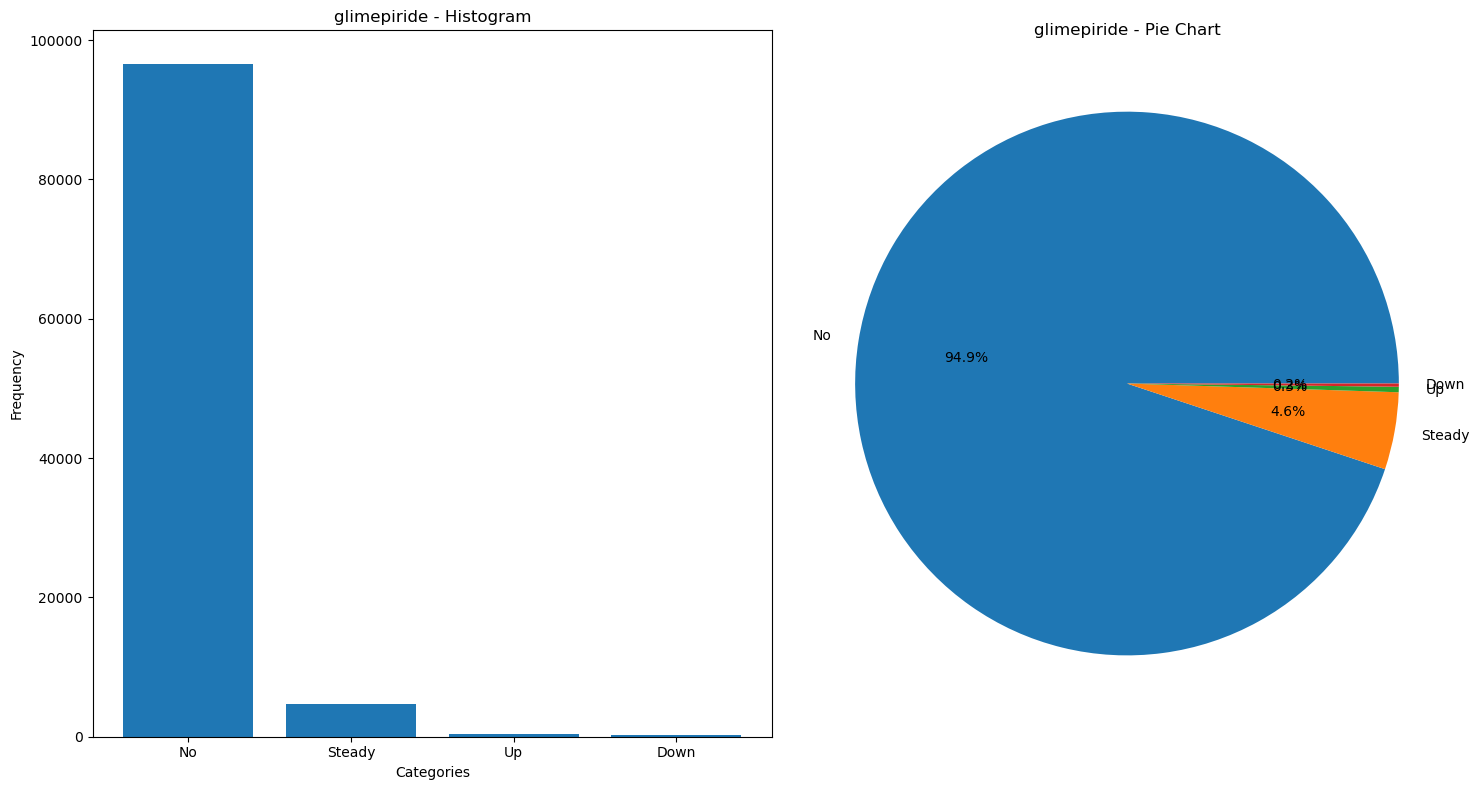

In [92]:
plot_histogram_pie('glimepiride')

The "glimepiride" column in the dataset represents the medication dosage change for the drug glimepiride. 

The majority of patients, with 96,575 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 4,670 patients. 

Additionally, there are 327 instances where the dosage is increased ("Up") and 194 instances where the dosage is decreased ("Down").

Value Counts:
No        101765
Steady         1
Name: acetohexamide, dtype: int64


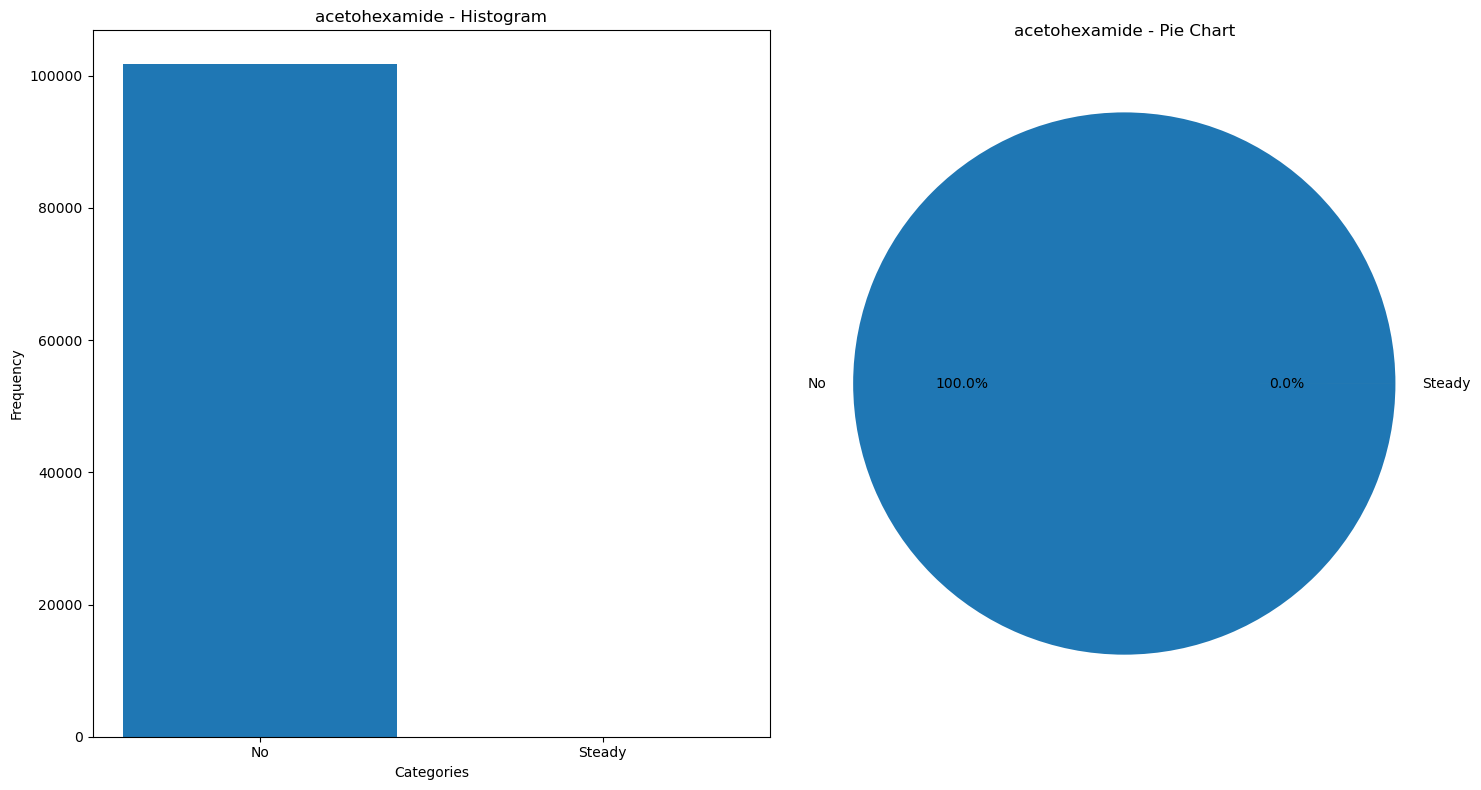

In [93]:
plot_histogram_pie('acetohexamide')

The "acetohexamide" column in the dataset represents the medication dosage change for the drug acetohexamide. 

The majority of patients, with 101,765 instances, have no change in the dosage ("No"). There is only 1 instance where the dosage is kept steady ("Steady"). 

Value Counts:
No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64


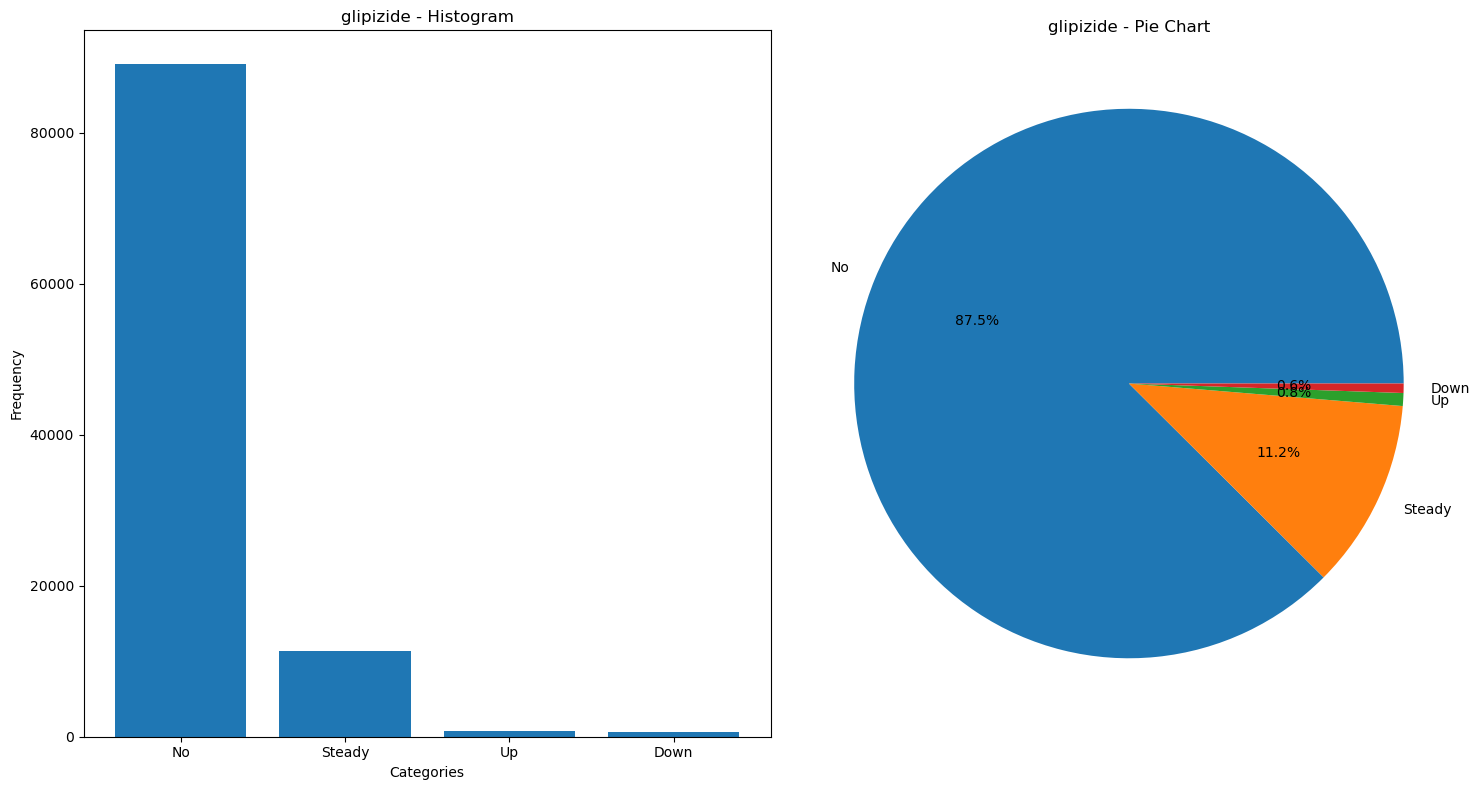

In [94]:
plot_histogram_pie('glipizide')

The "glipizide" column in the dataset represents the medication dosage change for the drug glipizide. 

The majority of patients, with 89,080 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 11,356 patients. Additionally, there are 770 instances where the dosage is increased ("Up") and 560 instances where the dosage is decreased ("Down"). 

Value Counts:
No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64


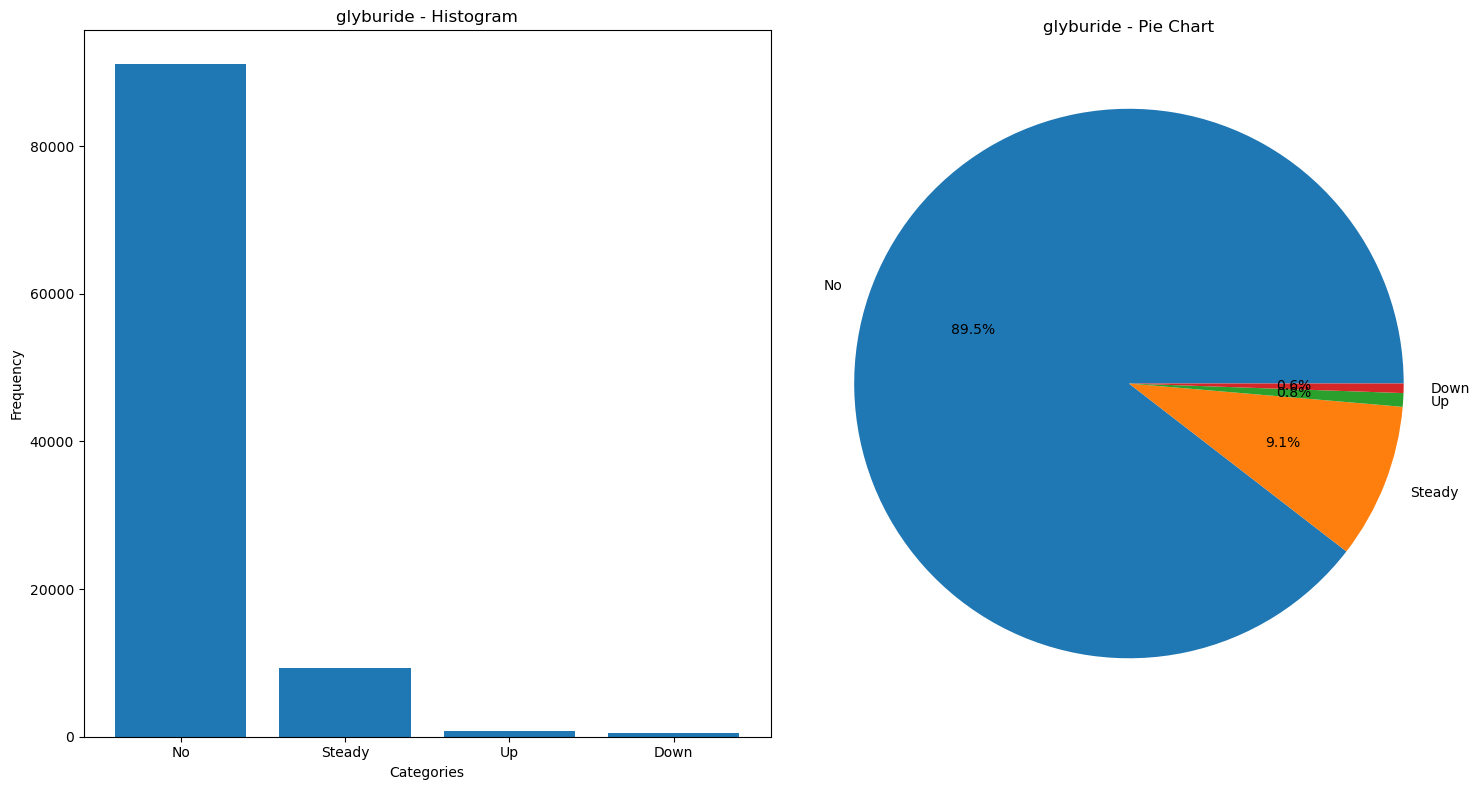

In [95]:
plot_histogram_pie('glyburide')

The "glyburide" column in the dataset represents the medication dosage change for the drug glyburide. 

The majority of patients, with 91,116 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 9,274 patients. Additionally, there are 812 instances where the dosage is increased ("Up") and 564 instances where the dosage is decreased ("Down").

Value Counts:
No        101743
Steady        23
Name: tolbutamide, dtype: int64


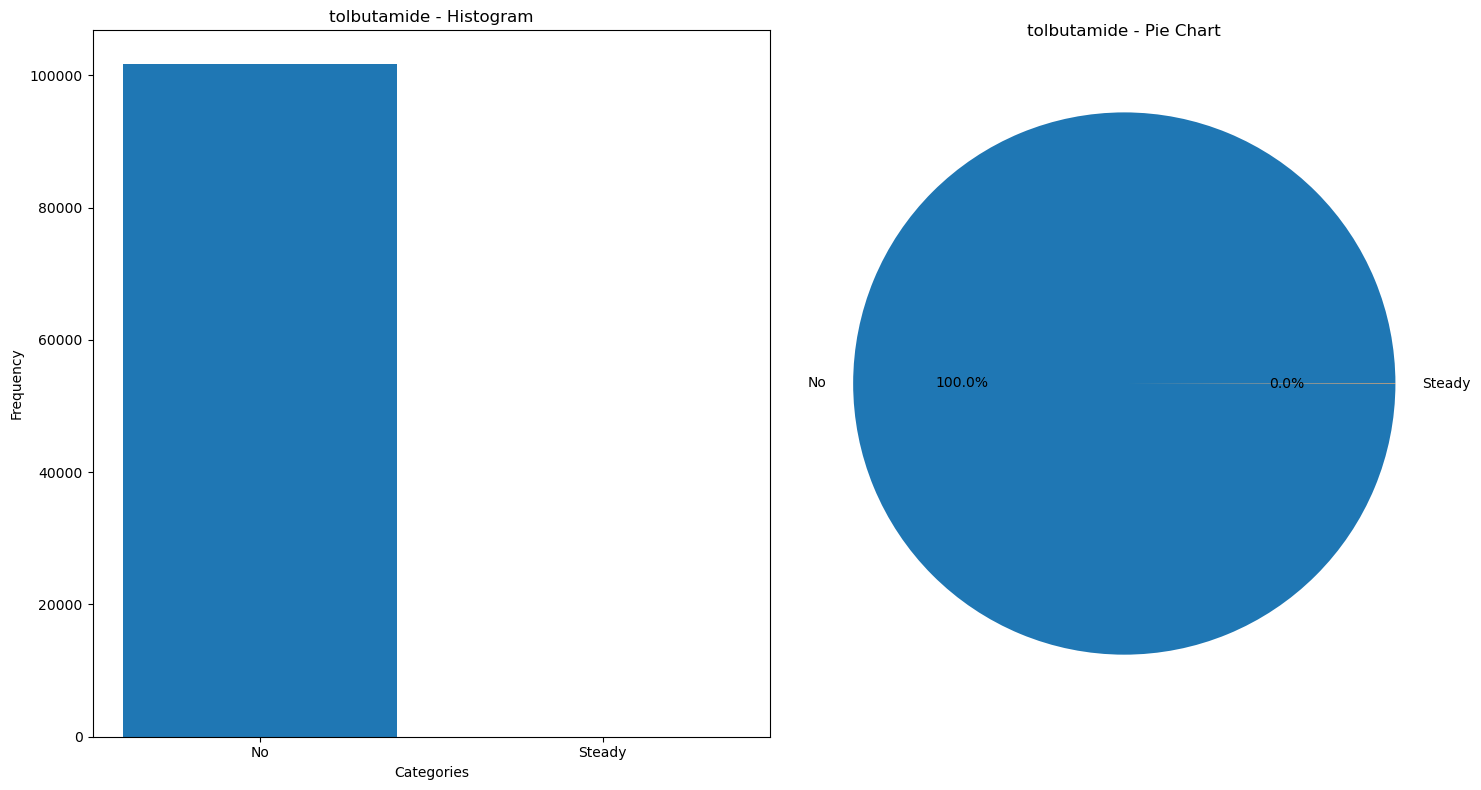

In [96]:
plot_histogram_pie('tolbutamide')

The "tolbutamide" column in the dataset represents the medication dosage change for the drug tolbutamide. 

The majority of patients, with 101,743 instances, have no change in the dosage ("No"). There are only 23 instances where the dosage is kept steady

Value Counts:
No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64


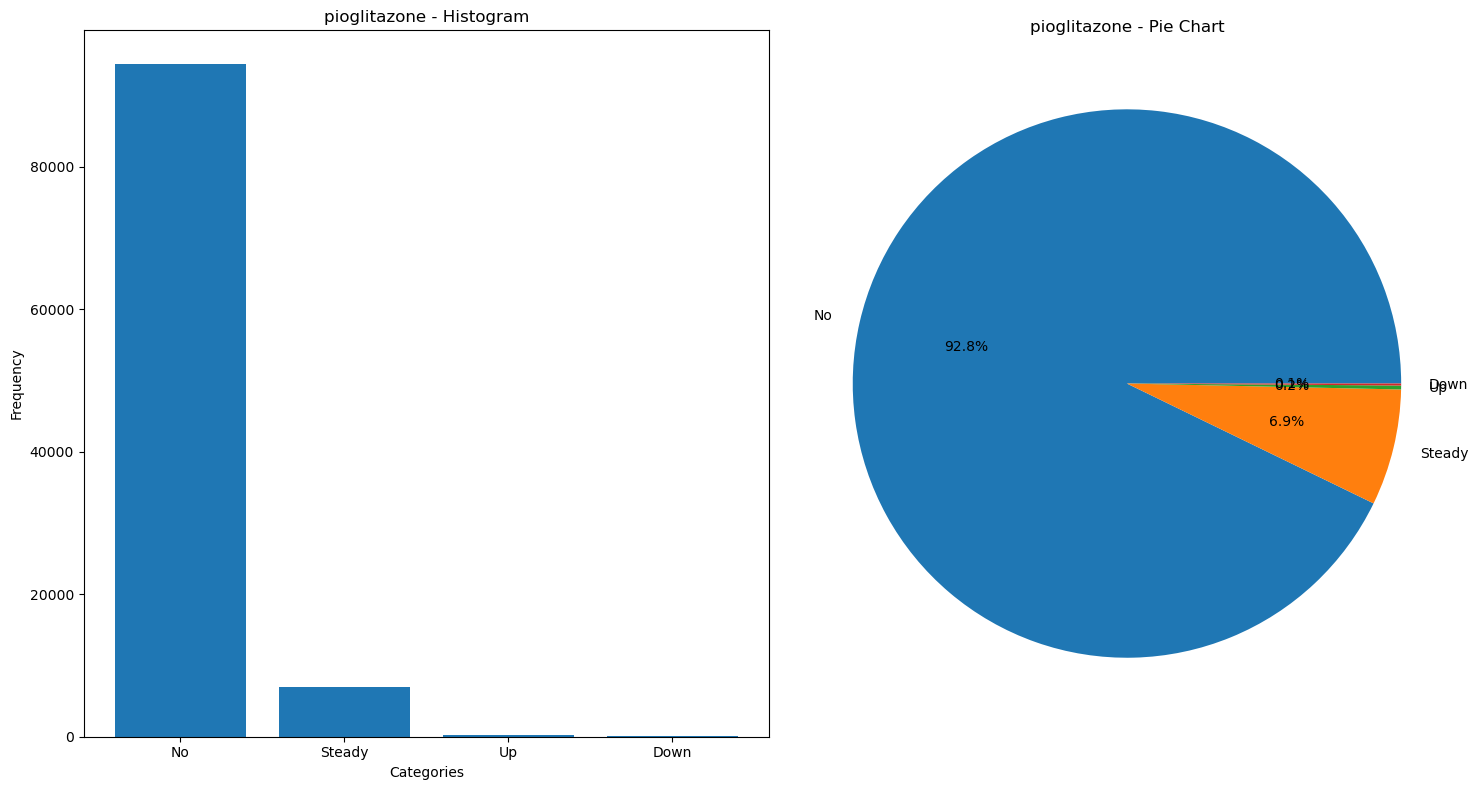

In [97]:
plot_histogram_pie('pioglitazone')

The "pioglitazone" column in the dataset represents the medication dosage change for the drug pioglitazone. 

The majority of patients, with 94,438 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 6,976 patients. Additionally, there are 234 instances where the dosage is increased ("Up") and 118 instances where the dosage is decreased ("Down").

Value Counts:
No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dtype: int64


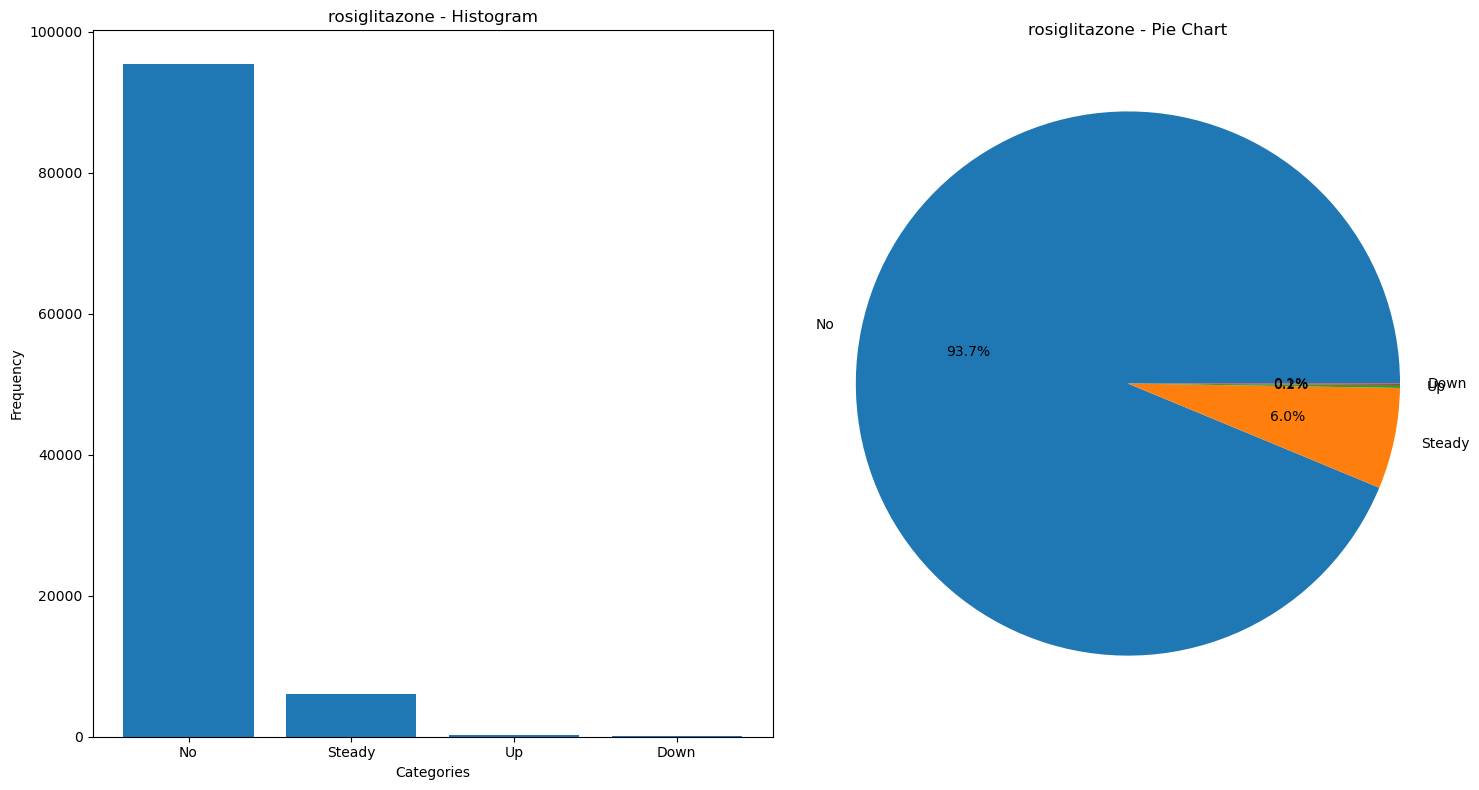

In [98]:
plot_histogram_pie('rosiglitazone')

The "rosiglitazone" column in the dataset represents the medication dosage change for the drug rosiglitazone. 

The majority of patients, with 95,401 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 6,100 patients. Additionally, there are 178 instances where the dosage is increased ("Up") and 87 instances where the dosage is decreased ("Down").

Value Counts:
No        101458
Steady       295
Up            10
Down           3
Name: acarbose, dtype: int64


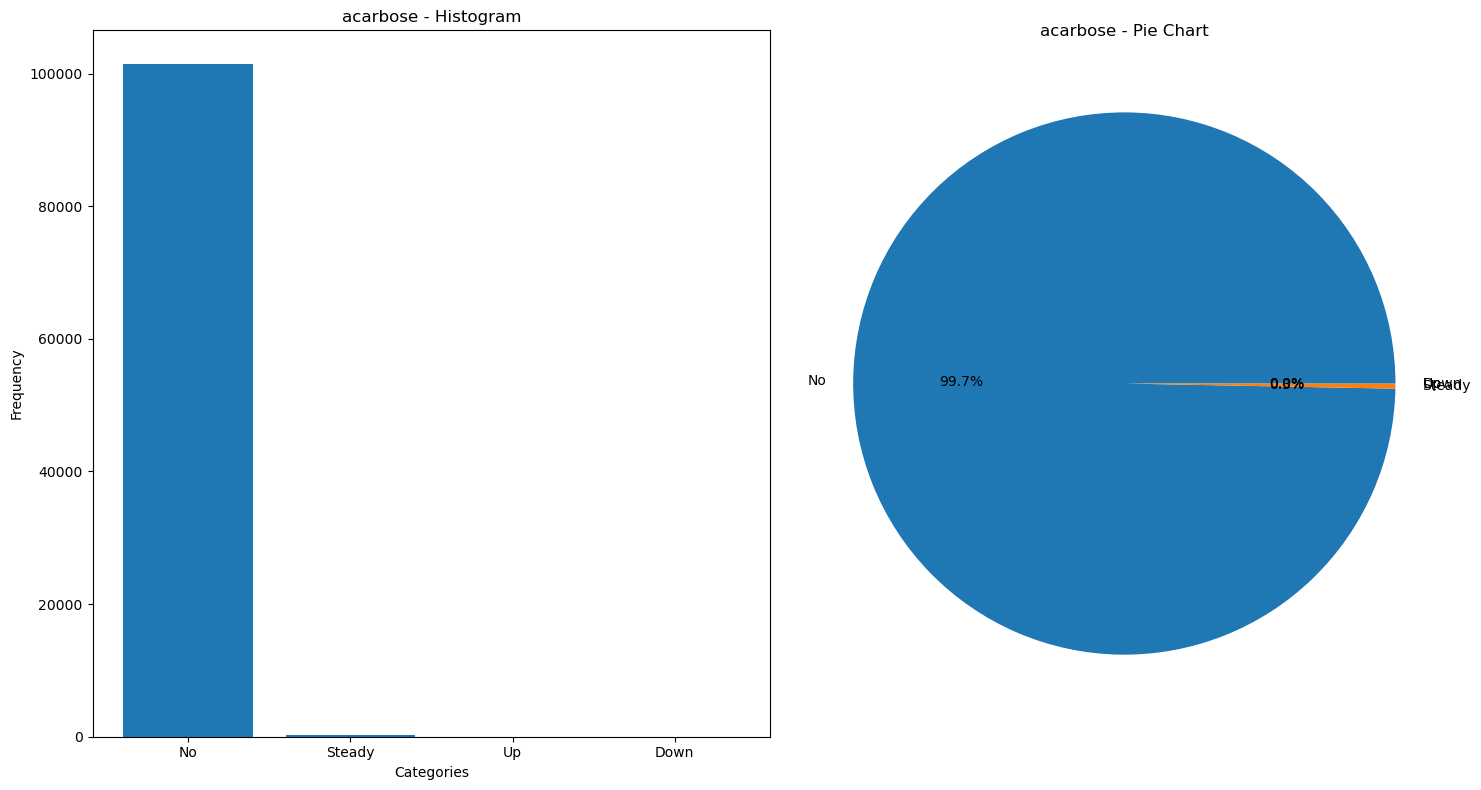

In [99]:
plot_histogram_pie('acarbose')

The "acarbose" column in the dataset represents the medication dosage change for the drug acarbose. 

The majority of patients, with 101,458 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 295 patients. Additionally, there are 10 instances where the dosage is increased ("Up") and 3 instances where the dosage is decreased ("Down"). 

Value Counts:
No        101728
Steady        31
Down           5
Up             2
Name: miglitol, dtype: int64


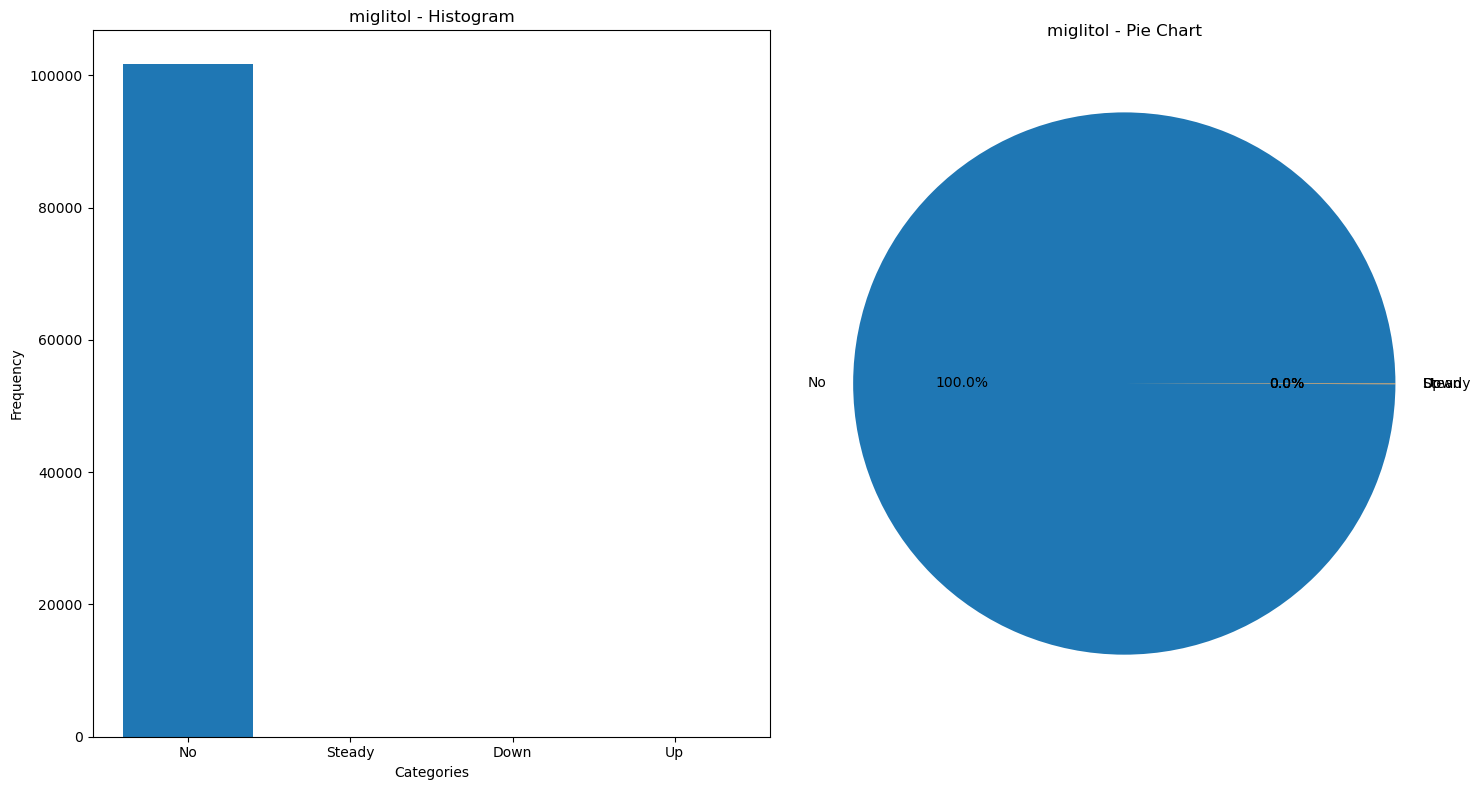

In [100]:
plot_histogram_pie('miglitol')

The "miglitol" column in the dataset represents the medication dosage change for the drug miglitol. 

The majority of patients, with 101,728 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 31 patients. Additionally, there are 5 instances where the dosage is decreased ("Down") and 2 instances where the dosage is increased ("Up"). 

Value Counts:
No        101763
Steady         3
Name: troglitazone, dtype: int64


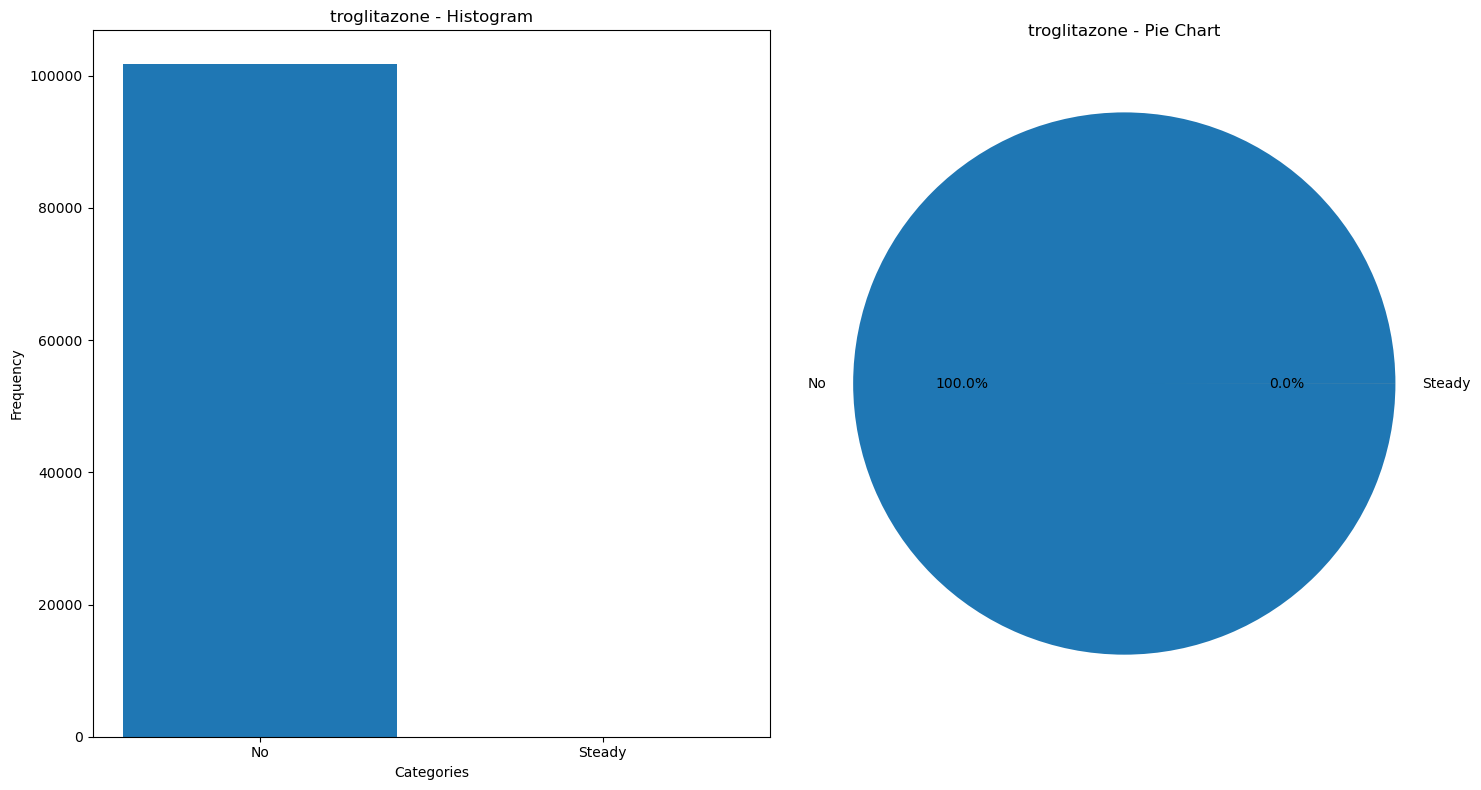

In [101]:
plot_histogram_pie('troglitazone')

The "troglitazone" column in the dataset represents the medication dosage change for the drug troglitazone. 

The majority of patients, with 101,763 instances, have no change in the dosage ("No"). There are only 3 instances where the dosage is kept steady. 

Troglitazone is a medication used to treat type 2 diabetes, but it has been withdrawn from the market due to safety concerns. Hence, it is expected to have a very low frequency of usage in the dataset.

Value Counts:
No        101727
Steady        38
Up             1
Name: tolazamide, dtype: int64


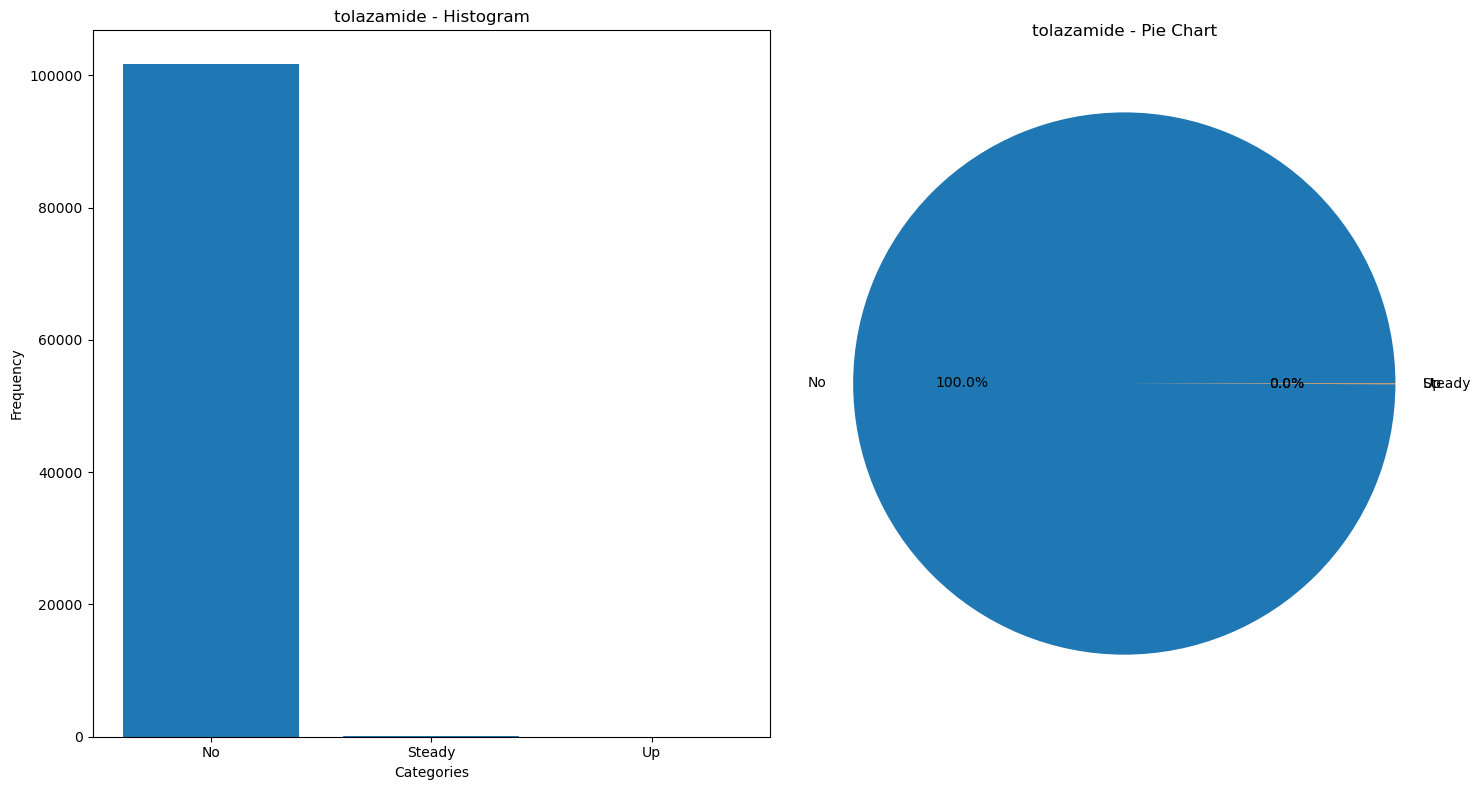

In [102]:
plot_histogram_pie('tolazamide')

The "tolazamide" column in the dataset represents the medication dosage change for the drug tolazamide. 

The majority of patients, with 101,727 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 38 patients. Additionally, there is only one instance where the dosage is increased ("Up"). 

Tolazamide is an oral antidiabetic medication used to control blood sugar levels in patients with type 2 diabetes.

Value Counts:
No    101766
Name: examide, dtype: int64


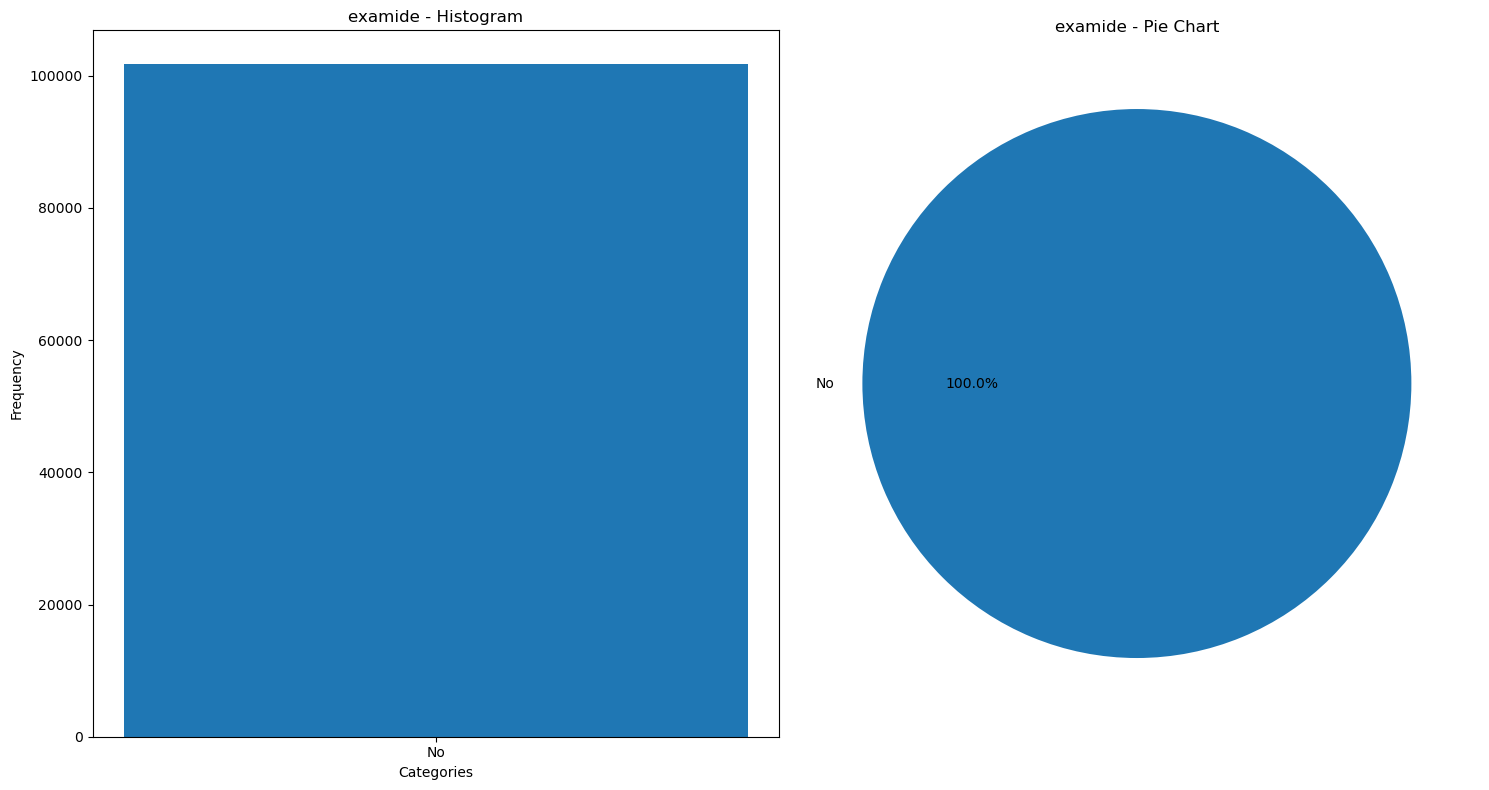

In [103]:
plot_histogram_pie('examide')

In the "examide" column of the dataset, there is only one unique value, which is "No". 

This means that all instances in the dataset have the value "No" for the "examide" feature. 

Therefore, this feature does not provide any useful information for analysis as it has no variability and does not contribute to distinguishing different instances in the dataset.

Value Counts:
No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64


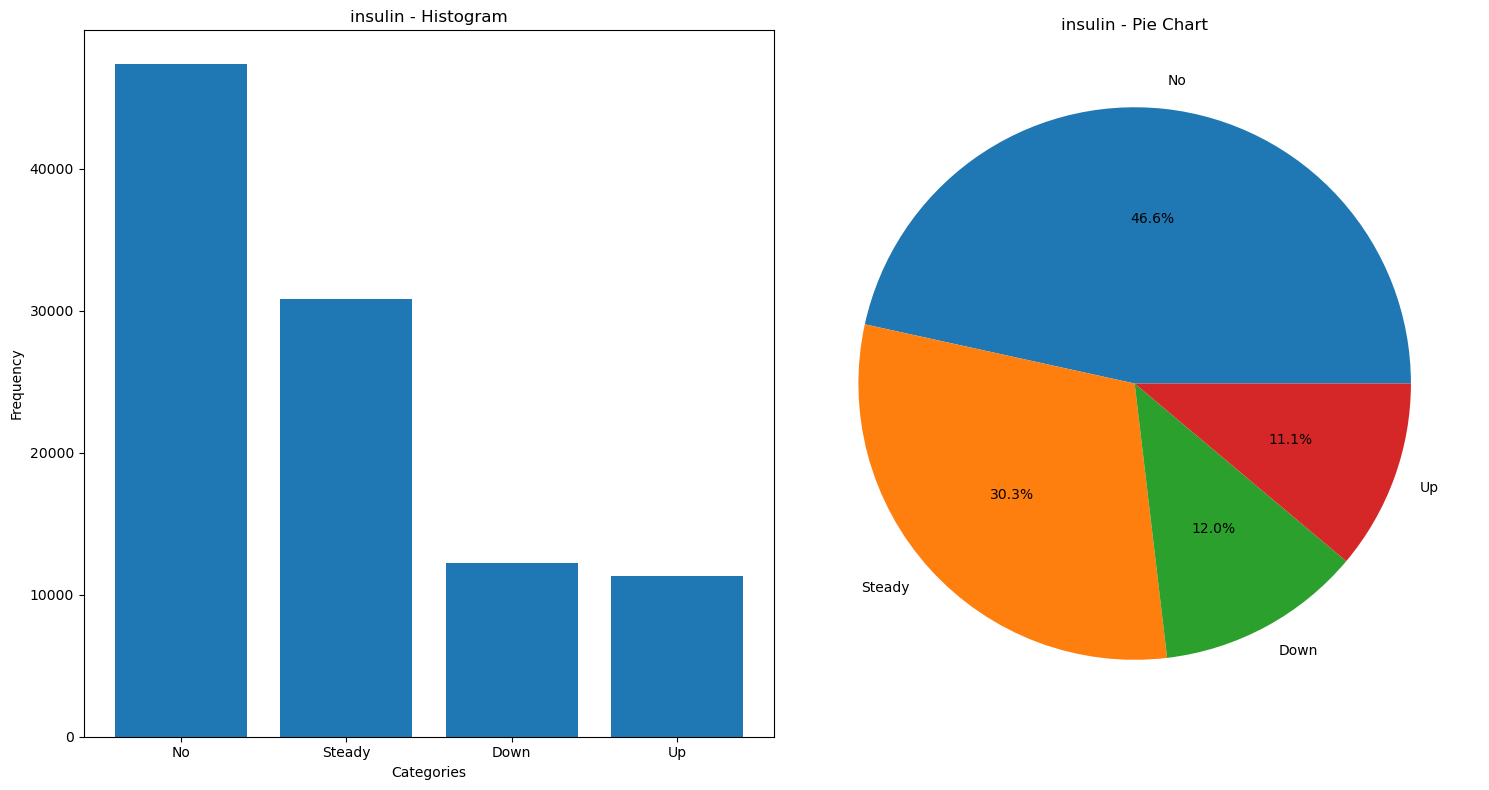

In [104]:
plot_histogram_pie('insulin')

The "insulin" column in the dataset represents the usage of insulin medication. 

Among the instances, 47,383 patients (approximately 46.6%) did not take insulin ("No"), while 30,849 patients (approximately 30.3%) took insulin in a steady dosage ("Steady"). 

Additionally, there were 12,218 instances (approximately 12%) where the dosage of insulin was decreased ("Down"), and 11,316 instances (approximately 11.1%) where the dosage was increased ("Up"). 

Insulin is a hormone used to regulate blood sugar levels in patients with diabetes, and the varying dosages reflect the individual needs of the patients in managing their condition.

Value Counts:
No        101060
Steady       692
Up             8
Down           6
Name: glyburide-metformin, dtype: int64


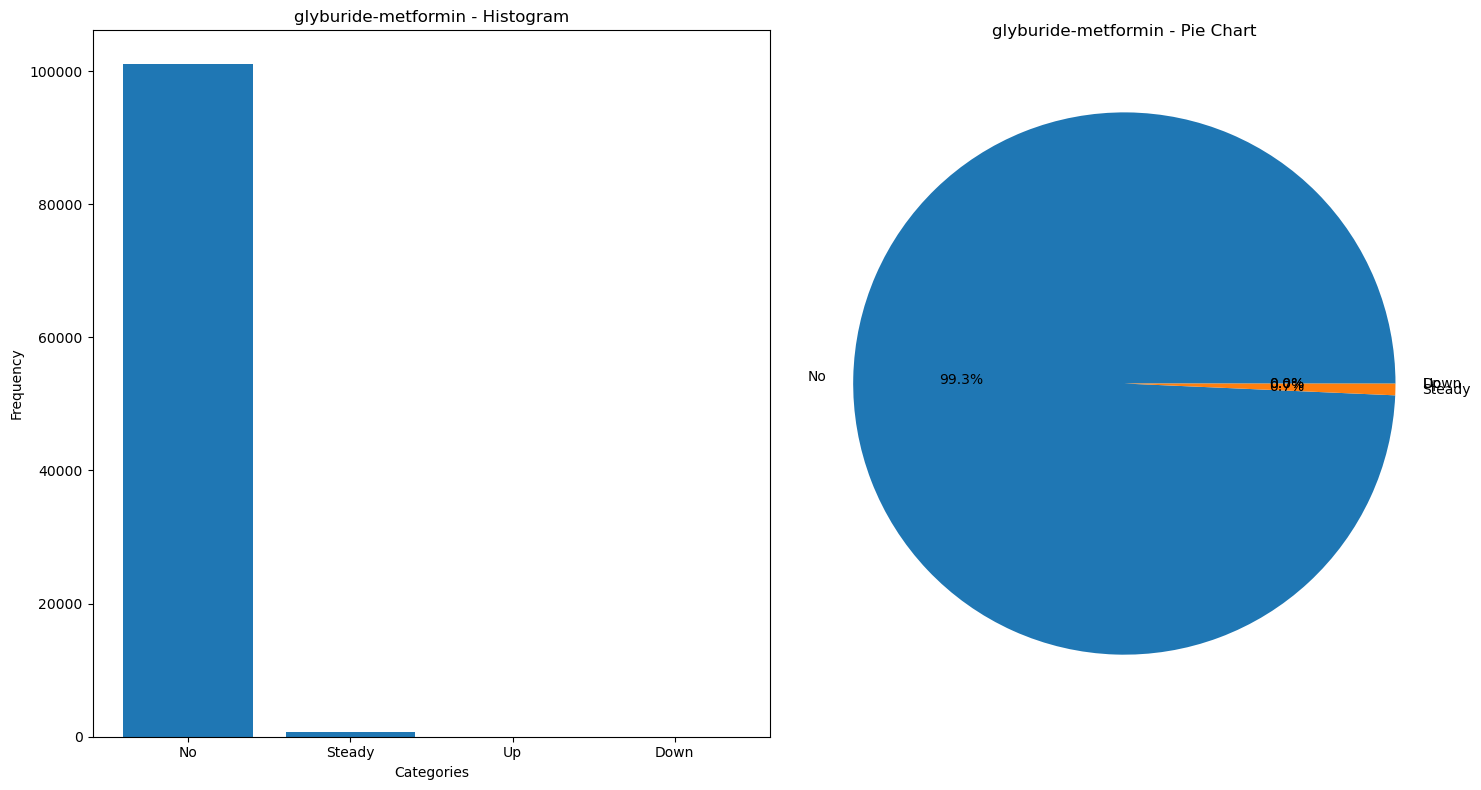

In [105]:
plot_histogram_pie('glyburide-metformin')

The "glyburide-metformin" column in the dataset represents the combination of the medications glyburide and metformin. 

Among the instances, 101,060 patients did not take the combination medication ("No"), while 692 patients took the combination medication in a steady dosage ("Steady"). Additionally, there were 8 instances where the dosage of the combination medication was increased ("Up"), and 6 instances where the dosage was decreased ("Down").

Value Counts:
No        101753
Steady        13
Name: glipizide-metformin, dtype: int64


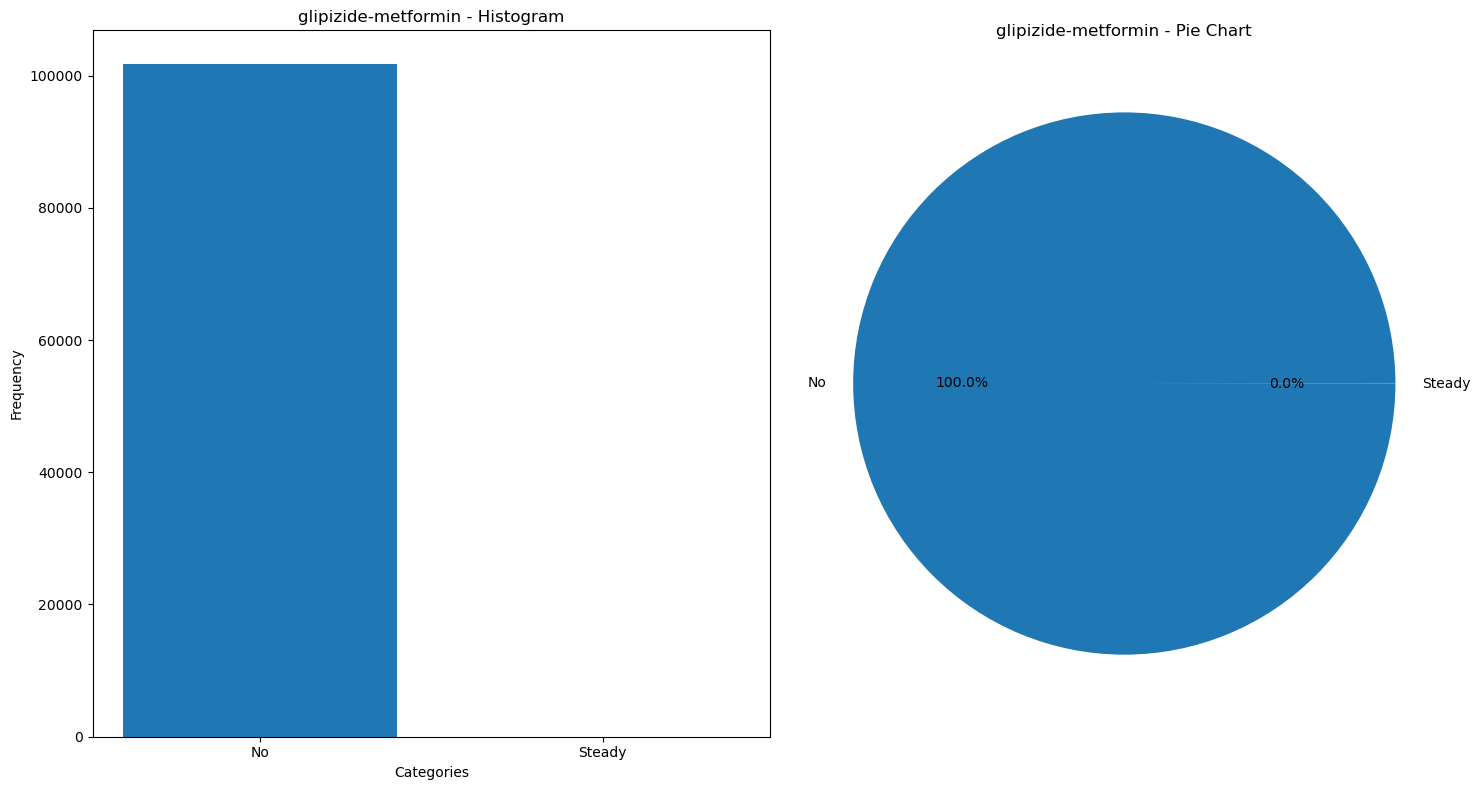

In [106]:
plot_histogram_pie('glipizide-metformin')

The "glipizide-metformin" column in the dataset represents the combination of the medications glipizide and metformin. 

Among the instances, 101,753 patients did not take the combination medication ("No"), while 13 patients took the combination medication in a steady dosage ("Steady").

Value Counts:
No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64


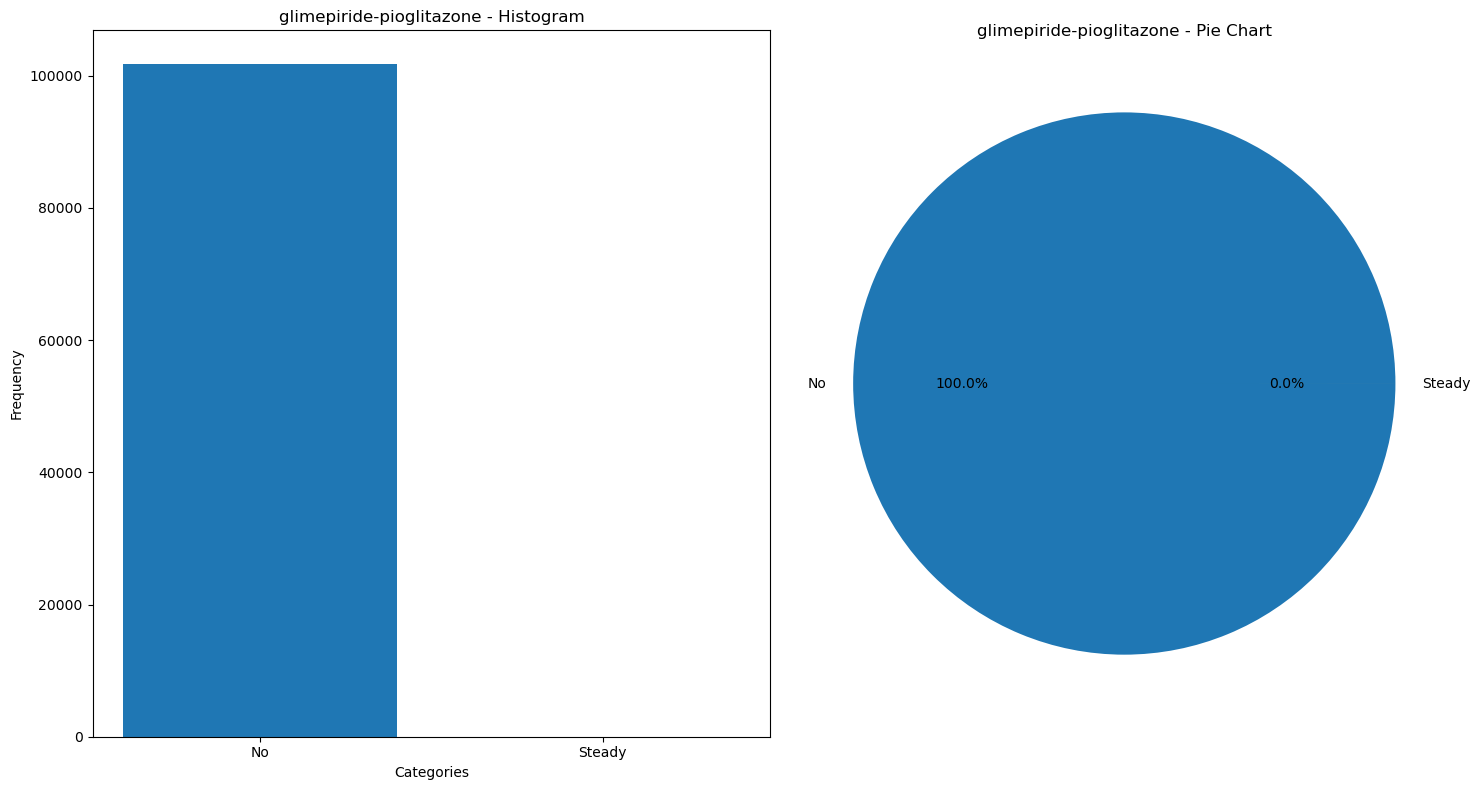

In [107]:
plot_histogram_pie('glimepiride-pioglitazone')

The "glimepiride-pioglitazone" column in the dataset represents the combination of the medications glimepiride and pioglitazone. 

Among the instances, 101,765 patients did not take the combination medication ("No"), while only one patient took the combination medication in a steady dosage ("Steady"). 

Value Counts:
No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64


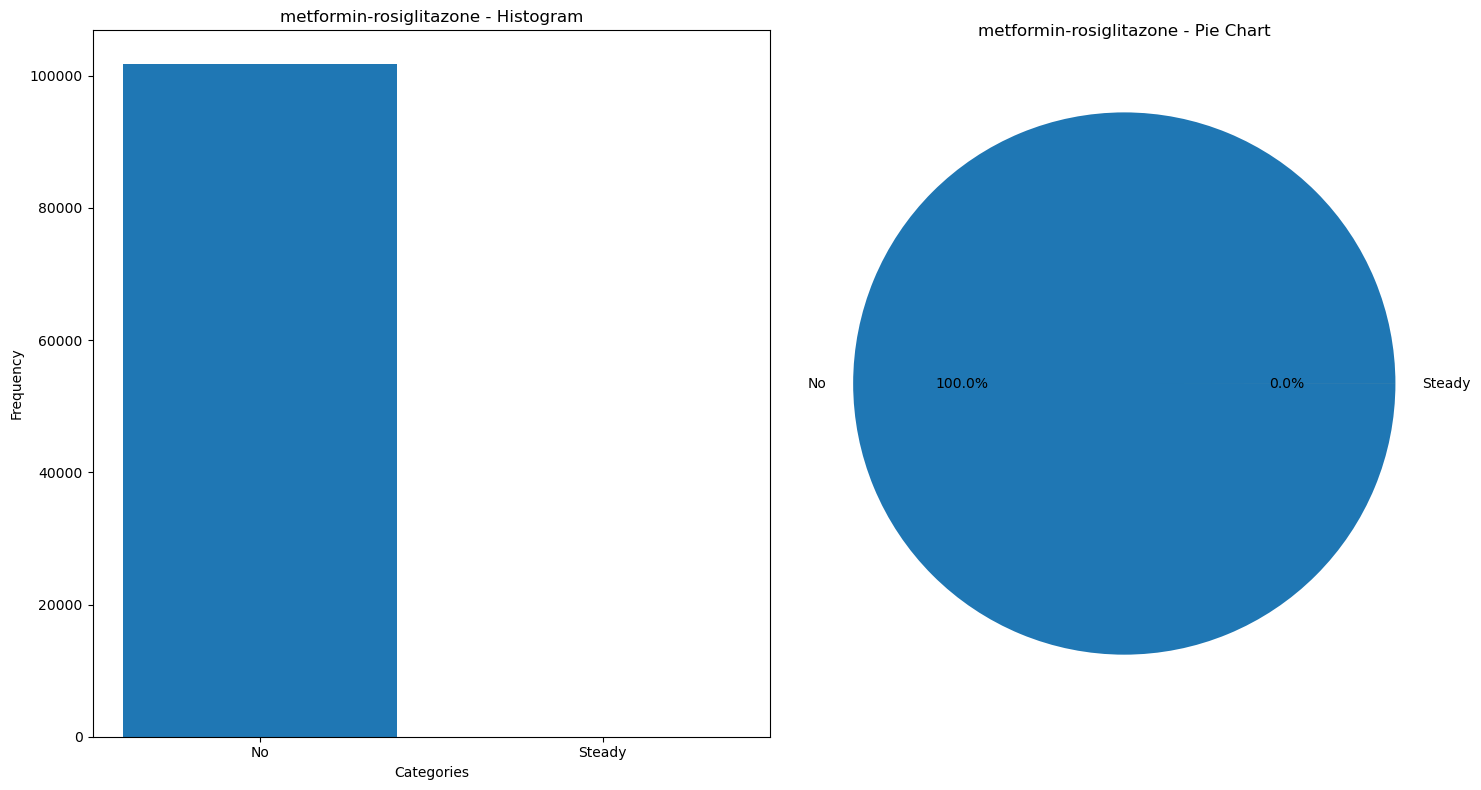

In [108]:
plot_histogram_pie('metformin-rosiglitazone')

The "metformin-rosiglitazone" column in the dataset represents the combination of the medications metformin and rosiglitazone. 

Among the instances, 101,764 patients did not take the combination medication ("No"), while two patients took the combination medication in a steady dosage ("Steady").

Value Counts:
No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64


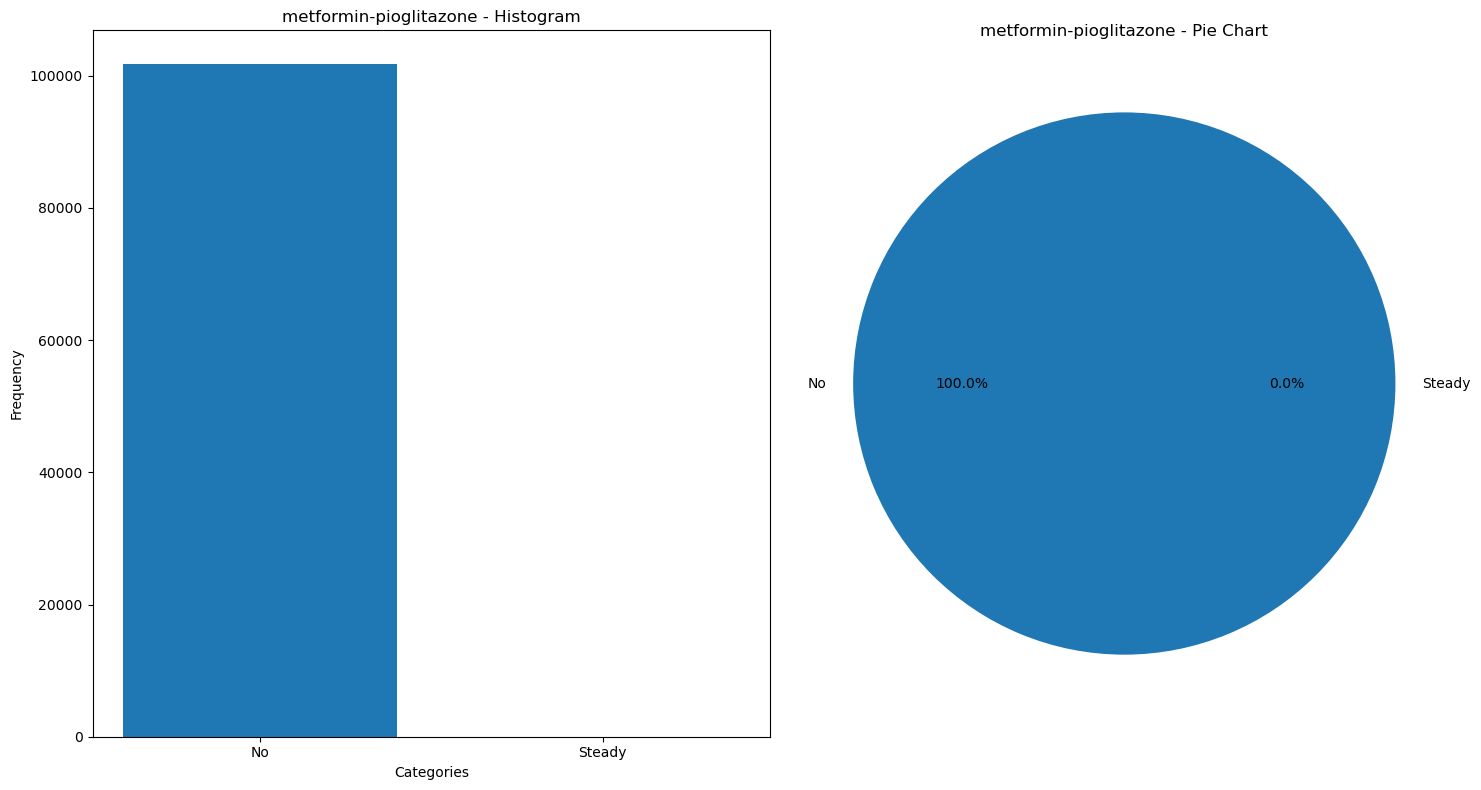

In [109]:
plot_histogram_pie('metformin-pioglitazone')

The "metformin-pioglitazone" column in the dataset represents the combination of the medications metformin and pioglitazone. 

Among the instances, 101,765 patients did not take the combination medication ("No"), while only one patient took the combination medication in a steady dosage ("Steady"). 

Value Counts:
No    54755
Ch    47011
Name: change, dtype: int64


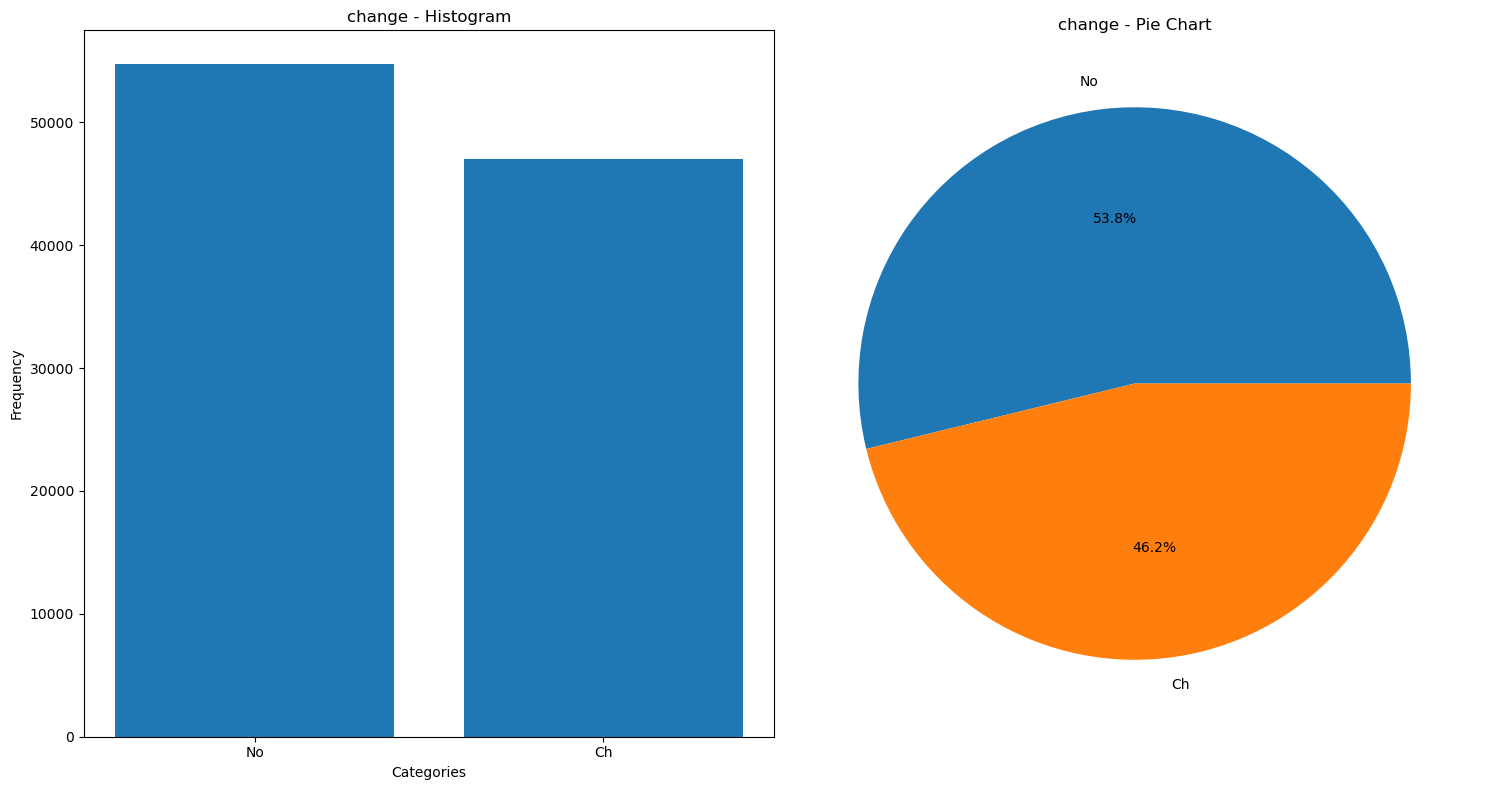

In [110]:
plot_histogram_pie('change')

The "change" column in the dataset represents whether there was a change in diabetes medication. 

Among the instances, 54,755 patients (approximately 53.6%) did not have a change in medication ("No"), while 47,011 patients (approximately 46.4%) had a change in medication ("Ch").

Value Counts:
Yes    78363
No     23403
Name: diabetesMed, dtype: int64


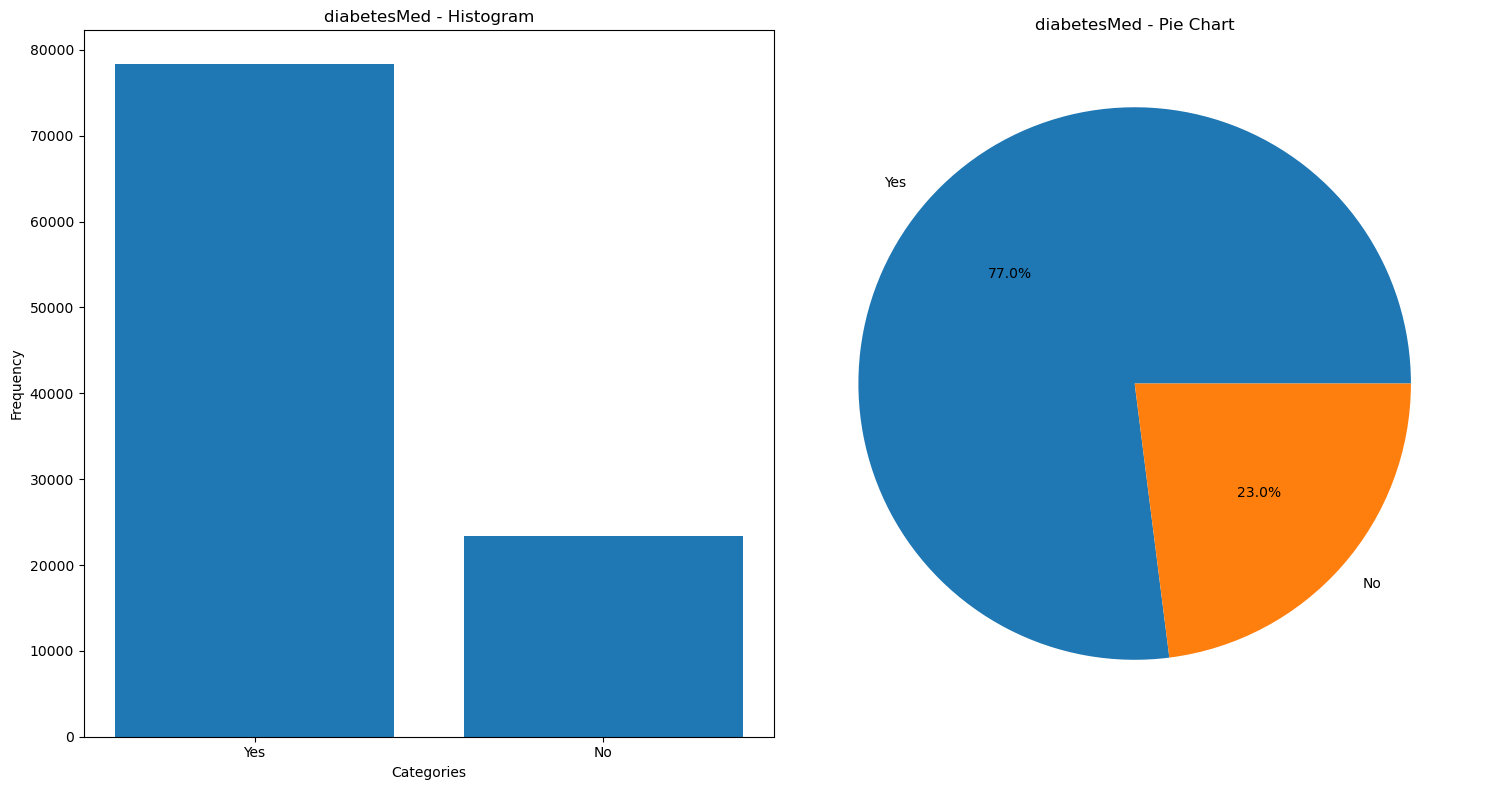

In [111]:
plot_histogram_pie('diabetesMed')

The "diabetesMed" column in the dataset indicates whether the patient was prescribed diabetes medication. 

Among the instances, 78,363 patients (approximately 77%) were prescribed diabetes medication ("Yes"), while 23,403 patients (approximately 23%) were not prescribed diabetes medication ("No").